In [1]:
#importing libraries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Loading the dataset
dataset=pd.read_csv('train_users_2.csv',na_values=['','NaN'," ",'-unknown-','NA',"."])

In [3]:
dataset.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
dataset['age'].unique()

array([      nan, 3.800e+01, 5.600e+01, 4.200e+01, 4.100e+01, 4.600e+01,
       4.700e+01, 5.000e+01, 3.600e+01, 3.700e+01, 3.300e+01, 3.100e+01,
       2.900e+01, 3.000e+01, 4.000e+01, 2.600e+01, 3.200e+01, 3.500e+01,
       5.900e+01, 4.900e+01, 4.400e+01, 3.400e+01, 2.800e+01, 1.900e+01,
       5.300e+01, 5.200e+01, 3.900e+01, 5.700e+01, 2.500e+01, 5.400e+01,
       6.900e+01, 6.300e+01, 4.300e+01, 5.500e+01, 6.500e+01, 5.800e+01,
       6.100e+01, 1.800e+01, 5.000e+00, 2.700e+01, 4.500e+01, 6.000e+01,
       4.800e+01, 5.100e+01, 6.400e+01, 7.200e+01, 7.000e+01, 6.700e+01,
       7.300e+01, 2.014e+03, 1.040e+02, 6.600e+01, 1.050e+02, 6.800e+01,
       9.500e+01, 2.400e+01, 9.400e+01, 7.500e+01, 7.900e+01, 6.200e+01,
       2.013e+03, 1.600e+01, 4.000e+00, 2.300e+01, 1.010e+02, 9.800e+01,
       7.600e+01, 7.400e+01, 8.700e+01, 9.200e+01, 1.150e+02, 7.100e+01,
       8.400e+01, 1.070e+02, 7.800e+01, 9.900e+01, 1.100e+02, 1.020e+02,
       8.200e+01, 7.700e+01, 2.200e+01, 8.900e+01, 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [6]:
#EDA(data cleansing)
dataset=dataset.drop(['id'],axis=1)
#Dropping colum for reducing the computing power

In [7]:
dataset.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [8]:
dataset.isnull().sum().sort_values(ascending=False).head(20)

date_first_booking         124543
gender                      95688
age                         87990
first_browser               27266
first_affiliate_tracked      6065
country_destination             0
first_device_type               0
signup_app                      0
affiliate_provider              0
affiliate_channel               0
language                        0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
date_account_created            0
dtype: int64

In [9]:
dataset.shape

(213451, 15)

In [10]:
total=dataset.isnull().sum().sort_values(ascending=False)
percent=((dataset.isnull().sum()/213451)*100).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_values

,Total,Percent
date_first_booking,124543,58.347349
gender,95688,44.829024
age,87990,41.222576
first_browser,27266,12.773892
first_affiliate_tracked,6065,2.841402
country_destination,0,0.000000
first_device_type,0,0.000000
signup_app,0,0.000000
affiliate_provider,0,0.000000
affiliate_channel,0,0.000000


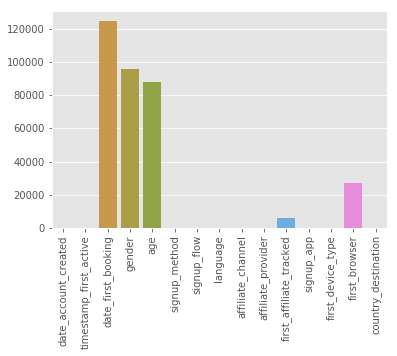

In [11]:
#Visualizing the missing values
plot=sns.barplot(x=dataset.columns.values,y=dataset.isnull().sum())
plt.xticks(rotation=90)
plt.show()

In [12]:
dataset=dataset.drop(['date_first_booking'],axis=1)

In [13]:
dataset.shape

(213451, 14)

In [14]:
dataset['gender'].fillna(np.random.choice(['FEMALE','MALE']),inplace=True)

In [15]:
dataset.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,FEMALE,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [16]:
dataset['gender'].value_counts()

FEMALE    158729
MALE       54440
OTHER        282
Name: gender, dtype: int64

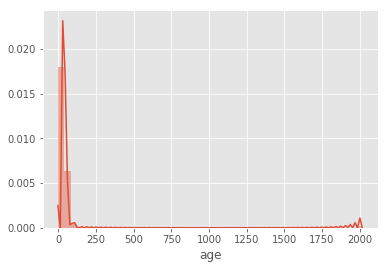

In [17]:
sns.distplot(dataset.age.dropna())
plt.show()

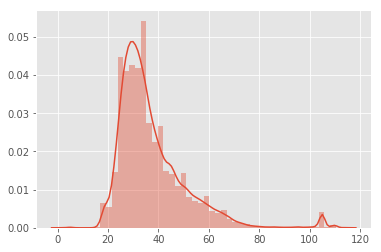

In [18]:
x=[]
for col in dataset['age'].dropna():
    if (col>0 and col<=120):
        x.append(col)
sns.distplot(x)
plt.show()

In [19]:
col_values=dataset['age'].values
dataset['age']=np.where(np.logical_or(col_values>80,col_values<18),np.NaN,col_values)

In [20]:
c=0
for col in dataset['age'].dropna():
    c=c+1
print(c)

122532


In [21]:
np.sum(dataset['age'].dropna())

4458926.0

In [22]:
x=4458926/122532
x

36.38988998792152

In [23]:
dataset['age'].fillna(36,inplace=True)

In [24]:
for col in dataset['age']:
    print(col)

36.0
38.0
56.0
42.0
41.0
36.0
46.0
47.0
50.0
46.0
36.0
47.0
36.0
37.0
36.0
33.0
36.0
31.0
36.0
29.0
36.0
30.0
40.0
36.0
40.0
26.0
36.0
32.0
35.0
37.0
42.0
31.0
31.0
29.0
59.0
49.0
31.0
30.0
36.0
35.0
26.0
30.0
29.0
36.0
36.0
44.0
36.0
36.0
36.0
34.0
30.0
36.0
33.0
28.0
44.0
19.0
53.0
36.0
52.0
36.0
36.0
39.0
36.0
36.0
35.0
40.0
36.0
36.0
36.0
36.0
36.0
31.0
29.0
36.0
57.0
30.0
49.0
37.0
36.0
26.0
36.0
36.0
36.0
36.0
32.0
33.0
46.0
40.0
25.0
25.0
54.0
32.0
36.0
28.0
57.0
47.0
34.0
36.0
35.0
32.0
36.0
34.0
40.0
36.0
36.0
69.0
36.0
30.0
42.0
63.0
36.0
33.0
36.0
36.0
44.0
36.0
26.0
29.0
43.0
30.0
36.0
36.0
26.0
36.0
33.0
42.0
36.0
36.0
39.0
36.0
47.0
52.0
59.0
53.0
36.0
25.0
36.0
36.0
55.0
36.0
36.0
36.0
36.0
35.0
36.0
65.0
33.0
38.0
36.0
41.0
29.0
36.0
32.0
36.0
28.0
46.0
35.0
35.0
34.0
63.0
36.0
36.0
36.0
36.0
58.0
57.0
61.0
36.0
36.0
36.0
36.0
35.0
36.0
31.0
36.0
36.0
36.0
36.0
18.0
36.0
36.0
35.0
36.0
36.0
37.0
35.0
36.0
42.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
18.0
36.0
33.0
36.0
36.0


36.0
33.0
35.0
32.0
32.0
37.0
32.0
38.0
36.0
48.0
36.0
36.0
37.0
35.0
31.0
36.0
36.0
30.0
31.0
62.0
36.0
36.0
47.0
36.0
36.0
43.0
41.0
38.0
33.0
36.0
34.0
36.0
36.0
37.0
36.0
36.0
36.0
30.0
37.0
36.0
27.0
37.0
19.0
36.0
36.0
37.0
36.0
56.0
54.0
36.0
36.0
36.0
29.0
36.0
32.0
34.0
42.0
18.0
36.0
35.0
36.0
39.0
54.0
41.0
39.0
36.0
44.0
27.0
25.0
46.0
37.0
37.0
36.0
36.0
36.0
36.0
36.0
45.0
54.0
36.0
33.0
29.0
56.0
33.0
30.0
32.0
30.0
36.0
36.0
36.0
53.0
34.0
26.0
51.0
36.0
36.0
36.0
18.0
33.0
36.0
41.0
36.0
35.0
36.0
36.0
60.0
36.0
36.0
36.0
35.0
31.0
36.0
36.0
67.0
36.0
56.0
29.0
63.0
45.0
37.0
57.0
30.0
35.0
36.0
31.0
34.0
36.0
27.0
35.0
31.0
41.0
32.0
36.0
28.0
36.0
36.0
27.0
45.0
36.0
36.0
33.0
36.0
31.0
36.0
32.0
36.0
36.0
35.0
70.0
27.0
25.0
28.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
36.0
32.0
30.0
39.0
43.0
41.0
30.0
30.0
30.0
36.0
36.0
36.0
64.0
36.0
34.0
36.0
36.0
34.0
36.0
39.0
36.0
36.0
31.0
32.0
36.0
36.0
31.0
32.0
29.0
31.0
36.0
42.0
36.0
36.0
36.0
39.0
56.0
36.0
36.0


36.0
36.0
36.0
28.0
36.0
27.0
36.0
36.0
55.0
27.0
21.0
36.0
36.0
36.0
36.0
36.0
31.0
36.0
44.0
36.0
36.0
32.0
36.0
32.0
25.0
36.0
36.0
25.0
55.0
36.0
30.0
64.0
36.0
65.0
36.0
36.0
36.0
33.0
39.0
35.0
36.0
33.0
36.0
36.0
36.0
41.0
36.0
48.0
36.0
45.0
36.0
36.0
35.0
36.0
36.0
36.0
36.0
28.0
32.0
36.0
36.0
28.0
52.0
39.0
45.0
36.0
36.0
58.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
38.0
45.0
36.0
28.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
41.0
41.0
36.0
36.0
36.0
34.0
36.0
51.0
36.0
46.0
36.0
32.0
36.0
52.0
36.0
36.0
42.0
26.0
36.0
36.0
34.0
36.0
33.0
36.0
36.0
36.0
45.0
36.0
36.0
41.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
34.0
36.0
25.0
36.0
25.0
37.0
38.0
36.0
36.0
45.0
46.0
31.0
36.0
30.0
36.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
33.0
28.0
36.0
36.0
36.0
25.0
64.0
36.0
45.0
36.0
36.0
36.0
36.0
39.0
29.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
33.0
38.0
19.0
36.0
36.0
30.0
37.0
36.0
36.0
31.0
36.0
28.0
36.0


34.0
36.0
37.0
36.0
43.0
30.0
35.0
31.0
30.0
52.0
36.0
41.0
36.0
32.0
36.0
29.0
67.0
36.0
32.0
44.0
26.0
42.0
36.0
36.0
26.0
28.0
36.0
30.0
27.0
27.0
26.0
64.0
43.0
38.0
36.0
36.0
36.0
36.0
60.0
30.0
36.0
32.0
36.0
26.0
33.0
36.0
33.0
36.0
29.0
32.0
29.0
36.0
36.0
36.0
63.0
33.0
43.0
51.0
36.0
36.0
31.0
40.0
30.0
36.0
43.0
36.0
34.0
55.0
36.0
36.0
47.0
50.0
47.0
31.0
36.0
35.0
51.0
44.0
36.0
36.0
61.0
35.0
30.0
36.0
36.0
36.0
32.0
30.0
48.0
37.0
34.0
36.0
36.0
39.0
38.0
36.0
31.0
33.0
36.0
36.0
36.0
18.0
30.0
45.0
29.0
36.0
28.0
29.0
54.0
60.0
37.0
29.0
36.0
36.0
33.0
36.0
27.0
35.0
30.0
36.0
27.0
36.0
59.0
36.0
56.0
30.0
36.0
36.0
35.0
36.0
34.0
27.0
36.0
36.0
36.0
36.0
58.0
34.0
27.0
36.0
36.0
49.0
36.0
32.0
36.0
36.0
41.0
37.0
37.0
33.0
36.0
28.0
36.0
36.0
34.0
41.0
59.0
36.0
25.0
36.0
38.0
31.0
36.0
27.0
36.0
36.0
36.0
32.0
38.0
42.0
32.0
31.0
31.0
42.0
26.0
48.0
30.0
31.0
29.0
31.0
49.0
62.0
33.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
34.0
39.0
36.0
36.0
47.0
39.0
31.0
47.0
32.0
36.0


26.0
36.0
36.0
38.0
42.0
36.0
36.0
53.0
36.0
31.0
33.0
33.0
38.0
36.0
36.0
36.0
31.0
36.0
33.0
45.0
21.0
49.0
28.0
36.0
33.0
45.0
27.0
28.0
21.0
51.0
47.0
34.0
33.0
19.0
36.0
24.0
18.0
37.0
29.0
58.0
36.0
66.0
30.0
39.0
33.0
37.0
36.0
61.0
57.0
44.0
32.0
36.0
39.0
39.0
32.0
37.0
67.0
36.0
33.0
51.0
42.0
31.0
32.0
36.0
36.0
35.0
36.0
31.0
40.0
36.0
28.0
35.0
41.0
50.0
44.0
34.0
26.0
29.0
36.0
27.0
36.0
36.0
58.0
36.0
54.0
36.0
29.0
28.0
28.0
36.0
36.0
50.0
37.0
49.0
30.0
36.0
26.0
61.0
36.0
29.0
26.0
31.0
39.0
58.0
38.0
56.0
36.0
32.0
36.0
36.0
64.0
36.0
36.0
26.0
36.0
31.0
36.0
36.0
47.0
39.0
42.0
34.0
47.0
47.0
60.0
36.0
36.0
35.0
30.0
36.0
27.0
40.0
26.0
30.0
36.0
32.0
36.0
36.0
31.0
47.0
61.0
36.0
34.0
42.0
36.0
38.0
36.0
36.0
27.0
35.0
38.0
62.0
41.0
42.0
25.0
36.0
42.0
36.0
36.0
29.0
36.0
36.0
47.0
33.0
31.0
33.0
43.0
27.0
30.0
29.0
32.0
43.0
36.0
30.0
47.0
48.0
29.0
36.0
26.0
56.0
36.0
36.0
36.0
46.0
30.0
32.0
35.0
42.0
57.0
26.0
41.0
36.0
32.0
32.0
36.0
34.0
45.0
49.0
38.0
30.0


36.0
36.0
32.0
29.0
36.0
36.0
34.0
36.0
25.0
36.0
29.0
36.0
36.0
50.0
36.0
42.0
38.0
42.0
55.0
36.0
32.0
36.0
40.0
37.0
36.0
39.0
35.0
31.0
36.0
29.0
35.0
36.0
29.0
34.0
40.0
28.0
36.0
46.0
59.0
28.0
36.0
36.0
36.0
28.0
36.0
75.0
52.0
36.0
38.0
36.0
45.0
29.0
31.0
64.0
49.0
41.0
28.0
42.0
39.0
43.0
29.0
42.0
36.0
43.0
36.0
36.0
33.0
29.0
54.0
36.0
70.0
22.0
53.0
33.0
36.0
36.0
36.0
36.0
34.0
36.0
36.0
30.0
29.0
64.0
36.0
38.0
56.0
49.0
32.0
28.0
34.0
36.0
31.0
47.0
58.0
36.0
51.0
31.0
36.0
34.0
36.0
54.0
36.0
35.0
40.0
31.0
29.0
43.0
32.0
62.0
34.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
36.0
30.0
32.0
36.0
40.0
50.0
26.0
27.0
26.0
36.0
36.0
36.0
41.0
36.0
36.0
42.0
35.0
59.0
29.0
36.0
36.0
51.0
36.0
36.0
28.0
36.0
31.0
36.0
36.0
50.0
37.0
36.0
65.0
36.0
23.0
59.0
35.0
36.0
36.0
33.0
59.0
39.0
29.0
35.0
36.0
36.0
33.0
48.0
28.0
36.0
56.0
36.0
54.0
36.0
36.0
31.0
42.0
50.0
34.0
42.0
36.0
33.0
59.0
36.0
33.0
24.0
37.0
29.0
32.0
41.0
36.0
36.0
34.0
36.0
23.0
36.0
31.0
36.0
43.0
35.0
32.0


29.0
27.0
36.0
46.0
43.0
49.0
36.0
36.0
36.0
31.0
38.0
36.0
27.0
29.0
36.0
36.0
35.0
36.0
37.0
36.0
36.0
36.0
27.0
37.0
53.0
61.0
36.0
36.0
35.0
36.0
35.0
47.0
42.0
32.0
38.0
34.0
33.0
33.0
30.0
29.0
36.0
38.0
36.0
36.0
33.0
47.0
24.0
36.0
39.0
36.0
36.0
32.0
36.0
32.0
35.0
40.0
36.0
36.0
26.0
36.0
46.0
28.0
36.0
44.0
39.0
34.0
29.0
28.0
50.0
36.0
43.0
36.0
36.0
36.0
39.0
35.0
38.0
43.0
26.0
33.0
30.0
36.0
25.0
30.0
36.0
36.0
43.0
50.0
36.0
31.0
36.0
53.0
36.0
35.0
43.0
45.0
34.0
36.0
36.0
43.0
36.0
25.0
29.0
36.0
40.0
60.0
28.0
36.0
18.0
36.0
36.0
36.0
66.0
32.0
36.0
36.0
36.0
53.0
34.0
43.0
36.0
36.0
36.0
36.0
36.0
40.0
36.0
32.0
35.0
61.0
32.0
39.0
29.0
36.0
53.0
64.0
42.0
36.0
49.0
29.0
39.0
36.0
36.0
25.0
50.0
28.0
36.0
56.0
36.0
23.0
30.0
29.0
36.0
30.0
67.0
24.0
26.0
44.0
35.0
63.0
40.0
36.0
28.0
18.0
27.0
36.0
36.0
33.0
34.0
48.0
56.0
50.0
65.0
65.0
66.0
52.0
26.0
31.0
34.0
36.0
36.0
36.0
39.0
30.0
34.0
19.0
31.0
32.0
36.0
40.0
34.0
30.0
35.0
32.0
36.0
34.0
37.0
28.0
32.0
51.0


36.0
52.0
36.0
53.0
31.0
56.0
43.0
36.0
44.0
33.0
32.0
36.0
42.0
36.0
29.0
35.0
36.0
36.0
21.0
53.0
33.0
36.0
29.0
36.0
29.0
36.0
36.0
57.0
30.0
33.0
42.0
34.0
36.0
28.0
36.0
27.0
36.0
45.0
32.0
33.0
48.0
36.0
36.0
27.0
26.0
36.0
41.0
25.0
68.0
28.0
32.0
28.0
36.0
44.0
35.0
50.0
33.0
37.0
49.0
66.0
27.0
38.0
23.0
36.0
36.0
36.0
36.0
36.0
40.0
32.0
31.0
18.0
32.0
34.0
36.0
42.0
36.0
28.0
27.0
25.0
34.0
33.0
29.0
36.0
40.0
27.0
28.0
41.0
34.0
46.0
39.0
36.0
31.0
45.0
36.0
31.0
30.0
31.0
38.0
63.0
36.0
29.0
28.0
33.0
36.0
44.0
36.0
37.0
35.0
28.0
36.0
26.0
36.0
50.0
47.0
57.0
30.0
39.0
31.0
31.0
36.0
64.0
30.0
36.0
36.0
46.0
35.0
44.0
39.0
36.0
40.0
36.0
30.0
36.0
36.0
37.0
36.0
22.0
31.0
33.0
36.0
38.0
26.0
29.0
30.0
36.0
42.0
37.0
38.0
36.0
28.0
34.0
42.0
40.0
36.0
22.0
36.0
36.0
40.0
36.0
39.0
41.0
36.0
33.0
30.0
41.0
30.0
36.0
36.0
64.0
28.0
36.0
36.0
34.0
36.0
53.0
36.0
36.0
36.0
36.0
45.0
34.0
36.0
39.0
33.0
54.0
30.0
61.0
24.0
18.0
31.0
34.0
35.0
40.0
31.0
29.0
36.0
28.0
36.0
36.0


36.0
35.0
25.0
32.0
36.0
36.0
36.0
36.0
28.0
36.0
43.0
56.0
36.0
36.0
22.0
46.0
33.0
54.0
53.0
34.0
31.0
42.0
40.0
45.0
32.0
25.0
36.0
61.0
31.0
26.0
28.0
35.0
49.0
29.0
32.0
34.0
36.0
34.0
32.0
36.0
25.0
42.0
36.0
48.0
29.0
37.0
30.0
36.0
36.0
30.0
31.0
44.0
65.0
34.0
47.0
37.0
44.0
29.0
35.0
38.0
73.0
36.0
35.0
71.0
38.0
36.0
36.0
42.0
36.0
32.0
25.0
36.0
36.0
36.0
60.0
55.0
36.0
36.0
57.0
48.0
36.0
28.0
44.0
42.0
28.0
42.0
36.0
46.0
36.0
36.0
27.0
40.0
36.0
22.0
29.0
36.0
58.0
26.0
35.0
36.0
49.0
64.0
36.0
25.0
43.0
35.0
36.0
23.0
36.0
36.0
28.0
56.0
55.0
22.0
31.0
38.0
48.0
32.0
36.0
33.0
38.0
36.0
30.0
36.0
28.0
53.0
36.0
51.0
36.0
39.0
37.0
55.0
45.0
36.0
41.0
36.0
31.0
24.0
33.0
42.0
36.0
40.0
62.0
36.0
36.0
33.0
66.0
32.0
27.0
31.0
36.0
43.0
33.0
36.0
52.0
37.0
36.0
36.0
33.0
46.0
36.0
41.0
24.0
36.0
30.0
25.0
39.0
38.0
23.0
45.0
44.0
29.0
35.0
36.0
61.0
29.0
47.0
58.0
28.0
36.0
34.0
23.0
31.0
61.0
77.0
36.0
28.0
25.0
40.0
43.0
68.0
43.0
29.0
29.0
42.0
36.0
26.0
36.0
33.0
36.0


27.0
36.0
65.0
36.0
38.0
29.0
37.0
36.0
36.0
47.0
68.0
34.0
36.0
51.0
29.0
32.0
46.0
40.0
48.0
36.0
31.0
34.0
43.0
33.0
36.0
36.0
43.0
36.0
36.0
43.0
47.0
37.0
28.0
53.0
44.0
36.0
36.0
36.0
41.0
33.0
36.0
31.0
60.0
36.0
40.0
49.0
54.0
28.0
34.0
45.0
74.0
27.0
31.0
36.0
44.0
35.0
36.0
36.0
37.0
42.0
41.0
31.0
38.0
57.0
60.0
43.0
36.0
39.0
22.0
36.0
35.0
44.0
25.0
50.0
50.0
36.0
24.0
30.0
36.0
25.0
33.0
36.0
24.0
36.0
31.0
36.0
36.0
36.0
36.0
29.0
73.0
46.0
30.0
44.0
38.0
36.0
29.0
36.0
43.0
36.0
33.0
52.0
33.0
29.0
36.0
39.0
62.0
29.0
39.0
36.0
36.0
36.0
38.0
47.0
36.0
66.0
34.0
39.0
36.0
36.0
36.0
26.0
41.0
36.0
43.0
36.0
36.0
48.0
36.0
31.0
27.0
43.0
36.0
36.0
63.0
22.0
36.0
37.0
36.0
28.0
36.0
38.0
37.0
36.0
36.0
36.0
36.0
29.0
58.0
31.0
42.0
34.0
47.0
29.0
36.0
36.0
24.0
35.0
38.0
36.0
36.0
44.0
36.0
33.0
40.0
34.0
42.0
28.0
30.0
28.0
58.0
61.0
63.0
29.0
39.0
33.0
36.0
36.0
36.0
36.0
29.0
36.0
37.0
43.0
30.0
36.0
26.0
36.0
27.0
26.0
27.0
36.0
33.0
29.0
62.0
40.0
65.0
36.0
35.0
36.0


36.0
36.0
29.0
36.0
18.0
34.0
36.0
25.0
45.0
40.0
24.0
36.0
36.0
42.0
50.0
30.0
40.0
31.0
58.0
33.0
33.0
33.0
30.0
45.0
36.0
29.0
28.0
36.0
36.0
24.0
38.0
34.0
31.0
40.0
34.0
36.0
36.0
68.0
36.0
37.0
46.0
36.0
36.0
36.0
36.0
40.0
32.0
26.0
46.0
26.0
35.0
31.0
42.0
35.0
36.0
31.0
36.0
36.0
36.0
34.0
40.0
25.0
31.0
41.0
36.0
52.0
29.0
32.0
36.0
19.0
36.0
59.0
57.0
36.0
38.0
51.0
30.0
42.0
40.0
62.0
27.0
31.0
28.0
49.0
32.0
36.0
38.0
36.0
44.0
36.0
41.0
36.0
35.0
36.0
49.0
31.0
23.0
37.0
34.0
43.0
35.0
29.0
45.0
29.0
30.0
42.0
36.0
35.0
29.0
27.0
34.0
57.0
60.0
36.0
36.0
36.0
45.0
28.0
36.0
26.0
38.0
36.0
33.0
26.0
32.0
33.0
29.0
35.0
60.0
40.0
23.0
32.0
52.0
26.0
36.0
36.0
36.0
43.0
38.0
62.0
33.0
36.0
37.0
36.0
19.0
36.0
34.0
30.0
36.0
53.0
35.0
36.0
36.0
33.0
25.0
36.0
33.0
38.0
36.0
41.0
39.0
30.0
31.0
46.0
53.0
36.0
36.0
18.0
25.0
36.0
57.0
27.0
32.0
26.0
28.0
36.0
52.0
50.0
42.0
73.0
46.0
46.0
35.0
27.0
38.0
56.0
34.0
37.0
31.0
36.0
31.0
43.0
59.0
29.0
28.0
36.0
36.0
34.0
36.0
48.0


59.0
53.0
36.0
49.0
48.0
31.0
28.0
36.0
36.0
27.0
36.0
50.0
29.0
53.0
36.0
34.0
65.0
36.0
32.0
25.0
36.0
36.0
34.0
57.0
42.0
36.0
48.0
36.0
36.0
31.0
29.0
31.0
39.0
41.0
59.0
21.0
36.0
69.0
30.0
25.0
36.0
43.0
32.0
48.0
36.0
39.0
46.0
39.0
28.0
36.0
33.0
36.0
41.0
39.0
44.0
51.0
40.0
31.0
44.0
25.0
44.0
24.0
26.0
31.0
39.0
54.0
29.0
36.0
27.0
36.0
40.0
34.0
36.0
24.0
36.0
36.0
34.0
43.0
35.0
36.0
33.0
36.0
36.0
36.0
38.0
43.0
25.0
36.0
36.0
38.0
32.0
28.0
36.0
41.0
31.0
31.0
40.0
35.0
36.0
57.0
41.0
38.0
36.0
49.0
36.0
36.0
29.0
53.0
29.0
35.0
29.0
36.0
33.0
55.0
36.0
40.0
39.0
41.0
36.0
38.0
56.0
52.0
29.0
32.0
55.0
29.0
51.0
36.0
50.0
60.0
44.0
36.0
31.0
24.0
36.0
29.0
36.0
36.0
60.0
33.0
64.0
36.0
47.0
38.0
18.0
36.0
33.0
52.0
29.0
52.0
32.0
45.0
36.0
27.0
36.0
68.0
64.0
27.0
31.0
29.0
33.0
36.0
36.0
36.0
29.0
36.0
52.0
42.0
38.0
36.0
40.0
36.0
29.0
25.0
27.0
34.0
36.0
29.0
33.0
32.0
49.0
26.0
30.0
46.0
28.0
42.0
36.0
34.0
36.0
32.0
36.0
44.0
36.0
38.0
39.0
32.0
35.0
29.0
36.0
41.0


30.0
36.0
33.0
39.0
23.0
25.0
36.0
27.0
51.0
49.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
35.0
36.0
37.0
23.0
67.0
23.0
36.0
35.0
36.0
42.0
42.0
55.0
36.0
40.0
32.0
36.0
36.0
27.0
36.0
37.0
32.0
36.0
30.0
35.0
36.0
23.0
49.0
35.0
36.0
27.0
31.0
31.0
35.0
42.0
49.0
35.0
36.0
34.0
36.0
36.0
36.0
31.0
36.0
26.0
45.0
36.0
33.0
28.0
27.0
46.0
36.0
36.0
36.0
36.0
57.0
36.0
27.0
27.0
36.0
51.0
39.0
29.0
59.0
36.0
36.0
36.0
62.0
36.0
33.0
36.0
28.0
49.0
48.0
36.0
30.0
36.0
30.0
36.0
35.0
36.0
33.0
36.0
24.0
32.0
41.0
43.0
53.0
68.0
36.0
41.0
27.0
36.0
36.0
26.0
35.0
26.0
26.0
61.0
36.0
18.0
36.0
36.0
33.0
36.0
30.0
31.0
29.0
36.0
39.0
28.0
31.0
30.0
41.0
36.0
40.0
25.0
36.0
44.0
36.0
63.0
62.0
36.0
29.0
36.0
36.0
39.0
26.0
36.0
36.0
29.0
30.0
24.0
30.0
30.0
42.0
36.0
36.0
24.0
37.0
51.0
28.0
28.0
36.0
36.0
33.0
36.0
36.0
27.0
34.0
43.0
36.0
40.0
48.0
36.0
45.0
31.0
36.0
38.0
36.0
36.0
49.0
36.0
31.0
36.0
23.0
51.0
36.0
34.0
36.0
36.0
26.0
38.0
48.0
36.0
38.0
36.0
36.0
36.0
25.0
29.0
36.0
33.0
35.0


36.0
72.0
36.0
27.0
36.0
35.0
46.0
36.0
50.0
36.0
36.0
41.0
74.0
43.0
36.0
25.0
30.0
25.0
24.0
36.0
36.0
36.0
39.0
36.0
36.0
36.0
64.0
40.0
27.0
18.0
26.0
30.0
36.0
61.0
36.0
48.0
36.0
42.0
61.0
27.0
36.0
34.0
34.0
24.0
36.0
27.0
36.0
26.0
44.0
33.0
44.0
34.0
53.0
36.0
36.0
39.0
25.0
37.0
36.0
36.0
49.0
36.0
36.0
40.0
36.0
36.0
36.0
29.0
27.0
29.0
32.0
56.0
22.0
44.0
24.0
36.0
33.0
28.0
36.0
36.0
26.0
36.0
51.0
49.0
36.0
44.0
29.0
30.0
31.0
40.0
36.0
36.0
36.0
35.0
36.0
39.0
36.0
36.0
36.0
57.0
44.0
36.0
39.0
36.0
33.0
58.0
36.0
36.0
36.0
36.0
30.0
46.0
32.0
40.0
36.0
36.0
39.0
55.0
51.0
36.0
31.0
30.0
38.0
33.0
35.0
32.0
40.0
35.0
36.0
36.0
51.0
27.0
22.0
36.0
35.0
40.0
46.0
43.0
36.0
36.0
40.0
36.0
49.0
36.0
36.0
45.0
22.0
28.0
29.0
36.0
56.0
36.0
36.0
28.0
46.0
42.0
60.0
36.0
65.0
36.0
29.0
36.0
36.0
36.0
45.0
44.0
29.0
45.0
47.0
45.0
36.0
47.0
34.0
18.0
36.0
36.0
36.0
35.0
36.0
36.0
31.0
36.0
36.0
32.0
36.0
39.0
30.0
27.0
36.0
46.0
36.0
35.0
36.0
36.0
71.0
36.0
27.0
25.0
36.0
26.0


33.0
31.0
34.0
36.0
34.0
30.0
36.0
21.0
42.0
36.0
31.0
36.0
36.0
57.0
37.0
34.0
36.0
28.0
36.0
45.0
35.0
35.0
28.0
38.0
36.0
36.0
35.0
42.0
36.0
35.0
35.0
32.0
43.0
19.0
36.0
28.0
29.0
51.0
24.0
27.0
41.0
36.0
27.0
36.0
41.0
36.0
36.0
29.0
46.0
52.0
36.0
36.0
36.0
68.0
36.0
67.0
36.0
32.0
36.0
39.0
27.0
26.0
37.0
36.0
34.0
43.0
33.0
29.0
41.0
34.0
34.0
42.0
36.0
36.0
18.0
32.0
48.0
36.0
30.0
36.0
65.0
36.0
33.0
32.0
28.0
42.0
36.0
36.0
34.0
36.0
36.0
36.0
38.0
43.0
36.0
44.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
37.0
34.0
29.0
45.0
45.0
28.0
36.0
36.0
35.0
50.0
64.0
31.0
46.0
32.0
36.0
36.0
36.0
36.0
36.0
56.0
36.0
36.0
26.0
57.0
34.0
23.0
38.0
35.0
35.0
29.0
40.0
49.0
32.0
31.0
36.0
44.0
38.0
36.0
43.0
31.0
31.0
30.0
36.0
36.0
36.0
36.0
23.0
28.0
36.0
36.0
36.0
34.0
36.0
28.0
19.0
38.0
36.0
36.0
36.0
37.0
36.0
36.0
47.0
37.0
25.0
38.0
36.0
36.0
31.0
36.0
36.0
36.0
52.0
33.0
36.0
38.0
24.0
28.0
36.0
36.0
30.0
36.0
37.0
36.0
29.0
42.0
36.0
36.0
24.0
36.0
60.0
36.0
30.0
36.0
61.0


46.0
41.0
31.0
40.0
32.0
35.0
44.0
36.0
36.0
33.0
25.0
36.0
36.0
36.0
55.0
35.0
36.0
36.0
57.0
65.0
60.0
36.0
36.0
46.0
29.0
37.0
36.0
36.0
29.0
45.0
36.0
36.0
36.0
36.0
41.0
36.0
36.0
36.0
36.0
36.0
26.0
36.0
46.0
36.0
43.0
29.0
31.0
28.0
36.0
36.0
34.0
40.0
65.0
36.0
34.0
36.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
48.0
36.0
36.0
49.0
53.0
22.0
70.0
36.0
38.0
36.0
36.0
38.0
68.0
38.0
36.0
23.0
43.0
48.0
28.0
36.0
41.0
36.0
37.0
36.0
36.0
36.0
36.0
36.0
36.0
34.0
32.0
24.0
36.0
34.0
36.0
36.0
28.0
35.0
36.0
36.0
55.0
21.0
30.0
28.0
39.0
29.0
46.0
19.0
35.0
31.0
29.0
36.0
36.0
45.0
19.0
25.0
38.0
31.0
36.0
25.0
36.0
26.0
29.0
36.0
22.0
53.0
41.0
58.0
30.0
35.0
36.0
36.0
37.0
36.0
36.0
29.0
33.0
36.0
36.0
32.0
36.0
36.0
36.0
60.0
35.0
24.0
40.0
61.0
36.0
34.0
29.0
34.0
62.0
36.0
29.0
39.0
36.0
41.0
36.0
36.0
36.0
36.0
36.0
56.0
36.0
36.0
36.0
36.0
31.0
36.0
39.0
24.0
41.0
31.0
33.0
36.0
55.0
36.0
36.0
36.0
36.0
46.0
34.0
25.0
29.0
35.0
34.0
36.0
45.0


36.0
40.0
35.0
54.0
32.0
36.0
36.0
39.0
36.0
37.0
36.0
38.0
36.0
46.0
36.0
51.0
23.0
36.0
36.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
46.0
36.0
36.0
36.0
71.0
30.0
37.0
36.0
27.0
25.0
42.0
51.0
36.0
34.0
30.0
38.0
30.0
32.0
28.0
36.0
39.0
36.0
36.0
36.0
32.0
39.0
50.0
65.0
36.0
36.0
40.0
27.0
30.0
19.0
44.0
36.0
35.0
36.0
36.0
52.0
55.0
33.0
36.0
36.0
36.0
20.0
31.0
36.0
34.0
36.0
33.0
30.0
28.0
33.0
26.0
46.0
39.0
36.0
27.0
36.0
36.0
36.0
26.0
32.0
47.0
36.0
36.0
36.0
42.0
31.0
36.0
27.0
36.0
36.0
28.0
36.0
22.0
32.0
36.0
38.0
27.0
29.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
29.0
36.0
34.0
27.0
36.0
30.0
25.0
36.0
68.0
36.0
36.0
36.0
36.0
36.0
29.0
34.0
36.0
36.0
45.0
54.0
36.0
50.0
28.0
36.0
36.0
30.0
36.0
36.0
31.0
36.0
36.0
27.0
36.0
25.0
36.0
29.0
43.0
25.0
36.0
36.0
34.0
39.0
36.0
36.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
41.0
29.0
30.0
36.0
36.0
36.0
38.0
36.0
44.0
36.0
46.0
44.0
18.0
36.0
36.0
18.0
44.0
36.0
32.0
49.0
36.0
33.0
36.0
36.0
36.0
36.0
29.0
38.0
32.0
46.0
40.0
36.0
53.0


36.0
30.0
59.0
36.0
28.0
36.0
36.0
22.0
36.0
20.0
29.0
41.0
36.0
36.0
61.0
36.0
36.0
35.0
36.0
36.0
37.0
36.0
36.0
36.0
36.0
44.0
36.0
36.0
36.0
36.0
36.0
36.0
44.0
31.0
36.0
31.0
36.0
41.0
42.0
40.0
36.0
38.0
36.0
45.0
36.0
36.0
36.0
37.0
36.0
40.0
38.0
31.0
39.0
36.0
29.0
41.0
41.0
56.0
46.0
27.0
36.0
38.0
31.0
21.0
26.0
27.0
36.0
41.0
29.0
29.0
36.0
30.0
36.0
36.0
36.0
43.0
36.0
36.0
36.0
36.0
22.0
30.0
46.0
36.0
36.0
30.0
28.0
56.0
71.0
32.0
36.0
45.0
36.0
36.0
34.0
36.0
55.0
36.0
36.0
32.0
23.0
36.0
41.0
24.0
44.0
66.0
34.0
36.0
40.0
36.0
36.0
28.0
36.0
42.0
53.0
36.0
28.0
34.0
26.0
36.0
19.0
46.0
54.0
42.0
36.0
32.0
52.0
36.0
63.0
33.0
32.0
36.0
35.0
30.0
32.0
62.0
36.0
36.0
28.0
30.0
32.0
36.0
29.0
36.0
30.0
32.0
36.0
25.0
36.0
27.0
24.0
36.0
36.0
55.0
36.0
36.0
35.0
27.0
36.0
31.0
43.0
36.0
33.0
36.0
35.0
36.0
36.0
31.0
40.0
35.0
36.0
36.0
36.0
43.0
38.0
36.0
36.0
36.0
44.0
39.0
52.0
56.0
36.0
36.0
36.0
36.0
36.0
36.0
33.0
37.0
52.0
36.0
40.0
39.0
36.0
31.0
36.0
48.0
38.0
36.0


29.0
29.0
40.0
33.0
27.0
36.0
31.0
30.0
36.0
29.0
26.0
31.0
55.0
36.0
31.0
36.0
27.0
27.0
39.0
60.0
36.0
36.0
34.0
31.0
34.0
36.0
36.0
36.0
26.0
32.0
31.0
36.0
36.0
28.0
36.0
36.0
36.0
45.0
36.0
49.0
28.0
50.0
36.0
26.0
40.0
36.0
36.0
23.0
34.0
36.0
36.0
33.0
33.0
19.0
34.0
31.0
36.0
26.0
36.0
52.0
36.0
45.0
36.0
36.0
36.0
36.0
32.0
51.0
36.0
31.0
26.0
36.0
36.0
36.0
36.0
36.0
32.0
36.0
27.0
36.0
36.0
36.0
36.0
36.0
36.0
46.0
27.0
36.0
36.0
36.0
41.0
36.0
36.0
36.0
27.0
50.0
59.0
36.0
36.0
36.0
44.0
33.0
55.0
32.0
36.0
36.0
36.0
28.0
36.0
37.0
36.0
32.0
62.0
22.0
46.0
36.0
27.0
33.0
36.0
47.0
37.0
28.0
36.0
36.0
32.0
36.0
36.0
41.0
36.0
58.0
36.0
29.0
33.0
64.0
36.0
31.0
36.0
36.0
31.0
36.0
37.0
36.0
32.0
46.0
35.0
27.0
37.0
36.0
45.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
50.0
60.0
36.0
36.0
30.0
37.0
33.0
32.0
39.0
33.0
36.0
36.0
36.0
27.0
36.0
29.0
27.0
31.0
36.0
51.0
65.0
37.0
36.0
36.0
36.0
55.0
54.0
61.0
36.0
36.0
40.0
31.0
28.0
39.0
66.0
29.0
36.0
32.0
36.0
36.0
33.0
38.0
30.0
36.0


36.0
67.0
36.0
25.0
36.0
36.0
36.0
30.0
36.0
36.0
40.0
33.0
36.0
26.0
35.0
52.0
26.0
52.0
54.0
36.0
63.0
33.0
31.0
36.0
30.0
36.0
26.0
36.0
52.0
38.0
31.0
32.0
32.0
48.0
42.0
36.0
59.0
36.0
28.0
29.0
36.0
36.0
52.0
36.0
36.0
32.0
36.0
25.0
36.0
27.0
42.0
36.0
30.0
31.0
36.0
36.0
36.0
42.0
36.0
36.0
79.0
45.0
36.0
36.0
32.0
36.0
36.0
29.0
36.0
36.0
26.0
36.0
35.0
42.0
37.0
36.0
36.0
35.0
39.0
36.0
54.0
37.0
36.0
36.0
36.0
26.0
36.0
35.0
36.0
29.0
34.0
26.0
37.0
36.0
43.0
36.0
19.0
36.0
33.0
36.0
27.0
36.0
32.0
30.0
34.0
36.0
34.0
36.0
54.0
43.0
39.0
36.0
35.0
36.0
28.0
27.0
36.0
65.0
36.0
36.0
31.0
36.0
56.0
36.0
27.0
36.0
41.0
36.0
29.0
34.0
36.0
32.0
36.0
46.0
33.0
36.0
34.0
36.0
36.0
41.0
36.0
45.0
34.0
33.0
34.0
36.0
29.0
52.0
69.0
24.0
26.0
32.0
36.0
40.0
39.0
36.0
36.0
36.0
54.0
33.0
37.0
36.0
28.0
36.0
53.0
63.0
36.0
36.0
39.0
43.0
73.0
45.0
36.0
36.0
36.0
60.0
40.0
36.0
36.0
52.0
36.0
37.0
36.0
36.0
36.0
40.0
36.0
36.0
62.0
36.0
36.0
36.0
30.0
36.0
36.0
31.0
36.0
36.0
24.0
36.0


48.0
41.0
36.0
43.0
37.0
36.0
42.0
36.0
45.0
33.0
36.0
36.0
50.0
44.0
36.0
26.0
36.0
47.0
27.0
36.0
35.0
36.0
36.0
36.0
39.0
36.0
41.0
36.0
31.0
34.0
53.0
50.0
33.0
28.0
36.0
29.0
46.0
29.0
46.0
33.0
36.0
24.0
36.0
37.0
46.0
41.0
36.0
36.0
27.0
43.0
36.0
36.0
26.0
37.0
32.0
36.0
25.0
36.0
36.0
36.0
24.0
36.0
26.0
46.0
31.0
28.0
36.0
36.0
36.0
58.0
36.0
35.0
58.0
36.0
69.0
55.0
50.0
36.0
36.0
36.0
64.0
29.0
36.0
36.0
34.0
36.0
36.0
36.0
32.0
39.0
60.0
40.0
28.0
36.0
36.0
36.0
32.0
36.0
31.0
45.0
36.0
36.0
55.0
50.0
36.0
36.0
36.0
36.0
44.0
42.0
33.0
37.0
33.0
36.0
36.0
36.0
39.0
36.0
36.0
36.0
32.0
36.0
36.0
32.0
36.0
45.0
38.0
36.0
47.0
36.0
28.0
36.0
26.0
31.0
36.0
32.0
53.0
51.0
36.0
23.0
36.0
47.0
56.0
36.0
36.0
36.0
32.0
40.0
36.0
36.0
36.0
75.0
36.0
31.0
49.0
36.0
42.0
36.0
24.0
27.0
36.0
38.0
36.0
50.0
49.0
36.0
34.0
47.0
36.0
27.0
36.0
36.0
36.0
36.0
36.0
32.0
38.0
36.0
47.0
36.0
28.0
45.0
30.0
36.0
69.0
57.0
36.0
26.0
33.0
25.0
36.0
58.0
26.0
36.0
36.0
39.0
22.0
34.0
36.0
33.0


36.0
35.0
27.0
36.0
27.0
29.0
36.0
36.0
44.0
31.0
36.0
27.0
36.0
44.0
31.0
36.0
36.0
40.0
36.0
30.0
27.0
36.0
19.0
36.0
27.0
65.0
30.0
32.0
65.0
36.0
36.0
36.0
36.0
36.0
68.0
36.0
36.0
36.0
58.0
26.0
36.0
30.0
40.0
39.0
28.0
37.0
61.0
36.0
36.0
36.0
33.0
36.0
33.0
42.0
36.0
39.0
37.0
36.0
28.0
35.0
27.0
37.0
36.0
43.0
36.0
36.0
41.0
36.0
36.0
27.0
27.0
36.0
36.0
36.0
49.0
29.0
36.0
66.0
36.0
36.0
50.0
35.0
36.0
36.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
36.0
45.0
34.0
36.0
39.0
36.0
39.0
64.0
36.0
36.0
36.0
37.0
27.0
28.0
33.0
27.0
45.0
28.0
36.0
36.0
36.0
36.0
32.0
28.0
37.0
36.0
36.0
40.0
45.0
30.0
36.0
32.0
36.0
36.0
28.0
60.0
36.0
25.0
28.0
36.0
36.0
34.0
49.0
25.0
36.0
48.0
36.0
36.0
36.0
37.0
52.0
45.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
34.0
48.0
54.0
36.0
26.0
25.0
32.0
28.0
30.0
36.0
36.0
32.0
27.0
26.0
36.0
25.0
32.0
26.0
36.0
42.0
36.0
42.0
48.0
33.0
33.0
36.0
29.0
36.0
58.0
24.0
31.0
32.0
44.0
37.0
36.0
48.0
52.0
31.0
18.0
33.0
36.0
36.0
65.0
36.0
31.0


36.0
36.0
25.0
36.0
33.0
45.0
36.0
36.0
29.0
39.0
56.0
36.0
33.0
36.0
45.0
36.0
32.0
38.0
41.0
36.0
36.0
36.0
36.0
34.0
36.0
29.0
38.0
33.0
30.0
27.0
35.0
36.0
36.0
32.0
36.0
36.0
35.0
28.0
36.0
36.0
36.0
34.0
33.0
28.0
31.0
49.0
36.0
44.0
36.0
26.0
36.0
32.0
36.0
34.0
59.0
36.0
61.0
58.0
30.0
41.0
31.0
29.0
36.0
36.0
29.0
56.0
35.0
36.0
35.0
30.0
35.0
36.0
36.0
28.0
29.0
58.0
29.0
36.0
40.0
36.0
36.0
42.0
38.0
33.0
27.0
36.0
36.0
36.0
33.0
31.0
56.0
27.0
36.0
64.0
34.0
36.0
24.0
30.0
45.0
36.0
36.0
36.0
24.0
36.0
33.0
36.0
36.0
36.0
34.0
41.0
34.0
34.0
36.0
24.0
34.0
34.0
57.0
30.0
36.0
36.0
54.0
36.0
36.0
26.0
44.0
36.0
36.0
36.0
66.0
36.0
36.0
24.0
26.0
36.0
36.0
29.0
35.0
33.0
36.0
42.0
36.0
49.0
36.0
37.0
36.0
36.0
35.0
32.0
35.0
36.0
36.0
39.0
36.0
36.0
39.0
57.0
36.0
36.0
49.0
36.0
35.0
25.0
36.0
29.0
34.0
36.0
29.0
36.0
32.0
36.0
33.0
36.0
36.0
36.0
34.0
59.0
35.0
23.0
35.0
36.0
36.0
36.0
63.0
50.0
37.0
30.0
31.0
36.0
41.0
36.0
49.0
38.0
23.0
36.0
40.0
36.0
38.0
45.0
37.0
42.0


39.0
30.0
53.0
43.0
36.0
44.0
32.0
60.0
37.0
40.0
63.0
36.0
31.0
30.0
30.0
36.0
38.0
37.0
51.0
26.0
32.0
67.0
60.0
36.0
36.0
45.0
47.0
34.0
30.0
27.0
36.0
36.0
36.0
52.0
53.0
36.0
41.0
51.0
29.0
38.0
32.0
36.0
36.0
36.0
36.0
36.0
38.0
36.0
32.0
36.0
36.0
63.0
27.0
33.0
36.0
38.0
36.0
51.0
36.0
61.0
36.0
36.0
36.0
61.0
50.0
38.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
47.0
28.0
36.0
33.0
34.0
41.0
31.0
38.0
38.0
45.0
36.0
36.0
38.0
36.0
33.0
27.0
36.0
36.0
28.0
28.0
36.0
42.0
49.0
42.0
34.0
34.0
36.0
45.0
36.0
36.0
31.0
23.0
36.0
36.0
34.0
39.0
27.0
31.0
36.0
25.0
36.0
47.0
36.0
36.0
36.0
36.0
36.0
33.0
39.0
45.0
36.0
31.0
36.0
38.0
36.0
25.0
36.0
42.0
36.0
30.0
61.0
36.0
50.0
41.0
19.0
36.0
32.0
36.0
34.0
46.0
63.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
61.0
36.0
36.0
30.0
53.0
20.0
36.0
41.0
25.0
36.0
34.0
36.0
55.0
40.0
32.0
36.0
58.0
27.0
36.0
34.0
42.0
36.0
18.0
36.0
36.0
36.0
45.0
54.0
36.0
36.0
26.0
36.0
37.0
36.0
36.0
36.0
38.0
36.0
41.0
36.0


36.0
36.0
36.0
36.0
37.0
36.0
31.0
35.0
41.0
36.0
26.0
40.0
36.0
36.0
31.0
25.0
36.0
33.0
31.0
36.0
36.0
36.0
32.0
32.0
29.0
36.0
39.0
35.0
43.0
36.0
32.0
36.0
36.0
32.0
37.0
36.0
36.0
29.0
28.0
69.0
60.0
40.0
36.0
25.0
36.0
42.0
28.0
36.0
36.0
36.0
44.0
36.0
26.0
36.0
36.0
63.0
25.0
30.0
38.0
36.0
29.0
30.0
30.0
31.0
31.0
25.0
32.0
36.0
41.0
71.0
52.0
36.0
21.0
36.0
42.0
37.0
36.0
47.0
29.0
29.0
36.0
34.0
45.0
35.0
57.0
37.0
38.0
78.0
36.0
29.0
36.0
44.0
36.0
48.0
36.0
36.0
29.0
43.0
36.0
36.0
36.0
34.0
65.0
36.0
34.0
36.0
32.0
36.0
36.0
35.0
41.0
36.0
33.0
32.0
29.0
36.0
36.0
28.0
36.0
38.0
30.0
27.0
35.0
36.0
36.0
36.0
26.0
36.0
36.0
36.0
27.0
26.0
64.0
34.0
36.0
38.0
36.0
43.0
36.0
36.0
34.0
36.0
36.0
36.0
33.0
36.0
36.0
36.0
52.0
39.0
61.0
36.0
42.0
31.0
36.0
36.0
36.0
36.0
54.0
36.0
36.0
25.0
32.0
31.0
28.0
36.0
36.0
25.0
35.0
54.0
36.0
27.0
36.0
36.0
28.0
36.0
41.0
33.0
19.0
32.0
18.0
28.0
36.0
27.0
34.0
36.0
36.0
36.0
36.0
32.0
36.0
36.0
36.0
36.0
33.0
41.0
27.0
32.0
34.0
35.0


40.0
37.0
36.0
36.0
36.0
36.0
34.0
36.0
54.0
36.0
36.0
26.0
30.0
38.0
36.0
36.0
26.0
40.0
29.0
32.0
44.0
39.0
35.0
32.0
55.0
36.0
36.0
47.0
35.0
25.0
22.0
46.0
36.0
25.0
41.0
80.0
32.0
36.0
31.0
29.0
28.0
51.0
42.0
36.0
37.0
45.0
41.0
36.0
27.0
31.0
36.0
36.0
47.0
38.0
40.0
32.0
36.0
22.0
27.0
26.0
38.0
36.0
34.0
36.0
34.0
38.0
27.0
36.0
40.0
18.0
27.0
36.0
36.0
30.0
36.0
35.0
36.0
36.0
27.0
36.0
36.0
36.0
36.0
36.0
35.0
22.0
35.0
47.0
31.0
36.0
31.0
28.0
36.0
32.0
36.0
25.0
32.0
39.0
36.0
36.0
33.0
36.0
37.0
38.0
25.0
45.0
36.0
53.0
29.0
35.0
39.0
36.0
29.0
42.0
49.0
41.0
45.0
36.0
47.0
36.0
34.0
43.0
26.0
33.0
29.0
36.0
31.0
37.0
36.0
36.0
59.0
36.0
26.0
36.0
36.0
36.0
31.0
36.0
29.0
52.0
36.0
36.0
26.0
35.0
30.0
36.0
36.0
27.0
46.0
26.0
34.0
27.0
36.0
25.0
25.0
28.0
45.0
24.0
27.0
45.0
36.0
24.0
36.0
36.0
36.0
42.0
29.0
31.0
36.0
26.0
32.0
50.0
36.0
27.0
31.0
33.0
40.0
36.0
47.0
56.0
37.0
29.0
43.0
32.0
36.0
40.0
38.0
34.0
30.0
32.0
22.0
25.0
35.0
24.0
30.0
35.0
36.0
25.0
21.0
36.0


32.0
58.0
34.0
36.0
37.0
36.0
36.0
35.0
43.0
34.0
36.0
33.0
36.0
35.0
51.0
36.0
35.0
36.0
24.0
37.0
58.0
36.0
32.0
27.0
36.0
36.0
36.0
24.0
36.0
37.0
36.0
36.0
37.0
36.0
36.0
21.0
61.0
36.0
36.0
33.0
36.0
36.0
25.0
26.0
36.0
36.0
35.0
40.0
33.0
43.0
37.0
34.0
36.0
36.0
35.0
36.0
36.0
36.0
35.0
28.0
48.0
36.0
36.0
37.0
36.0
36.0
36.0
35.0
36.0
36.0
36.0
36.0
36.0
51.0
28.0
34.0
37.0
27.0
34.0
36.0
32.0
36.0
34.0
61.0
24.0
36.0
46.0
44.0
49.0
36.0
28.0
38.0
43.0
28.0
36.0
36.0
33.0
28.0
36.0
39.0
32.0
36.0
39.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
77.0
36.0
33.0
36.0
32.0
36.0
67.0
36.0
47.0
29.0
30.0
42.0
36.0
38.0
36.0
36.0
26.0
34.0
36.0
38.0
40.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
46.0
32.0
26.0
36.0
36.0
36.0
24.0
36.0
66.0
34.0
61.0
49.0
36.0
36.0
33.0
25.0
29.0
26.0
58.0
66.0
36.0
36.0
36.0
27.0
36.0
46.0
36.0
36.0
39.0
28.0
36.0
42.0
36.0
36.0
28.0
31.0
48.0
48.0
32.0
39.0
38.0
24.0
48.0
26.0
28.0
36.0
40.0
32.0
36.0
36.0
36.0
58.0
54.0
37.0
30.0
51.0
56.0
36.0
36.0
36.0


32.0
19.0
32.0
37.0
37.0
29.0
24.0
28.0
36.0
36.0
27.0
40.0
36.0
36.0
39.0
40.0
36.0
35.0
53.0
58.0
36.0
28.0
29.0
28.0
36.0
38.0
33.0
34.0
36.0
37.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
34.0
36.0
36.0
39.0
36.0
36.0
36.0
53.0
51.0
38.0
33.0
36.0
30.0
22.0
23.0
31.0
31.0
36.0
36.0
43.0
36.0
29.0
45.0
32.0
36.0
35.0
36.0
34.0
29.0
26.0
38.0
36.0
36.0
47.0
36.0
52.0
53.0
33.0
36.0
38.0
33.0
66.0
21.0
42.0
32.0
36.0
34.0
54.0
47.0
29.0
36.0
47.0
36.0
39.0
31.0
36.0
33.0
36.0
35.0
36.0
65.0
53.0
27.0
32.0
30.0
36.0
36.0
36.0
43.0
33.0
36.0
34.0
60.0
36.0
46.0
36.0
36.0
36.0
49.0
36.0
35.0
36.0
36.0
36.0
26.0
29.0
36.0
36.0
36.0
55.0
48.0
36.0
51.0
36.0
36.0
34.0
36.0
36.0
53.0
31.0
59.0
31.0
35.0
36.0
36.0
41.0
36.0
34.0
36.0
51.0
36.0
46.0
67.0
52.0
38.0
36.0
36.0
47.0
32.0
34.0
36.0
36.0
30.0
36.0
60.0
43.0
30.0
73.0
44.0
31.0
36.0
36.0
25.0
36.0
34.0
33.0
36.0
32.0
30.0
40.0
36.0
36.0
36.0
36.0
44.0
36.0
36.0
36.0
44.0
33.0
27.0
27.0
36.0
30.0
45.0
25.0
36.0
45.0
36.0
36.0
36.0
56.0


32.0
36.0
25.0
29.0
45.0
45.0
35.0
43.0
36.0
52.0
36.0
30.0
36.0
29.0
36.0
54.0
34.0
40.0
32.0
30.0
36.0
24.0
38.0
36.0
26.0
36.0
45.0
36.0
34.0
62.0
36.0
36.0
33.0
36.0
36.0
36.0
30.0
47.0
36.0
36.0
38.0
36.0
36.0
61.0
36.0
36.0
36.0
28.0
24.0
36.0
30.0
38.0
36.0
36.0
39.0
30.0
36.0
25.0
36.0
29.0
59.0
36.0
49.0
40.0
28.0
36.0
36.0
52.0
42.0
36.0
38.0
58.0
36.0
49.0
35.0
36.0
36.0
35.0
36.0
68.0
31.0
33.0
70.0
36.0
33.0
36.0
36.0
44.0
34.0
36.0
65.0
22.0
47.0
36.0
36.0
25.0
33.0
36.0
39.0
58.0
36.0
36.0
36.0
38.0
28.0
36.0
42.0
40.0
36.0
36.0
46.0
47.0
48.0
40.0
36.0
48.0
29.0
36.0
36.0
36.0
36.0
31.0
66.0
30.0
19.0
44.0
34.0
32.0
38.0
41.0
30.0
35.0
26.0
30.0
36.0
28.0
36.0
36.0
36.0
36.0
33.0
36.0
27.0
25.0
80.0
37.0
50.0
49.0
36.0
36.0
36.0
36.0
29.0
52.0
31.0
36.0
46.0
36.0
36.0
36.0
36.0
25.0
36.0
36.0
42.0
36.0
49.0
36.0
60.0
36.0
36.0
36.0
27.0
31.0
36.0
34.0
33.0
36.0
36.0
36.0
36.0
27.0
37.0
37.0
63.0
28.0
28.0
36.0
36.0
26.0
34.0
35.0
38.0
36.0
36.0
22.0
37.0
29.0
32.0
33.0


36.0
28.0
47.0
27.0
37.0
36.0
36.0
36.0
26.0
43.0
42.0
36.0
36.0
36.0
44.0
54.0
36.0
28.0
36.0
27.0
30.0
38.0
29.0
34.0
36.0
37.0
29.0
36.0
40.0
36.0
36.0
42.0
19.0
36.0
36.0
62.0
36.0
48.0
36.0
26.0
28.0
58.0
42.0
31.0
25.0
36.0
36.0
36.0
36.0
33.0
36.0
31.0
39.0
36.0
36.0
26.0
36.0
27.0
36.0
36.0
48.0
28.0
60.0
36.0
42.0
36.0
36.0
57.0
29.0
31.0
36.0
27.0
45.0
36.0
27.0
30.0
36.0
33.0
36.0
36.0
34.0
31.0
36.0
33.0
34.0
36.0
27.0
36.0
39.0
36.0
32.0
31.0
26.0
36.0
36.0
31.0
25.0
24.0
57.0
55.0
36.0
34.0
36.0
36.0
36.0
36.0
47.0
36.0
38.0
35.0
36.0
29.0
25.0
23.0
36.0
18.0
38.0
35.0
30.0
29.0
59.0
36.0
31.0
32.0
36.0
65.0
36.0
28.0
35.0
27.0
35.0
29.0
36.0
62.0
37.0
49.0
26.0
27.0
36.0
43.0
36.0
36.0
36.0
44.0
42.0
36.0
27.0
39.0
37.0
36.0
34.0
33.0
36.0
36.0
36.0
44.0
73.0
36.0
52.0
30.0
36.0
36.0
50.0
28.0
48.0
36.0
32.0
35.0
45.0
48.0
36.0
30.0
43.0
32.0
28.0
25.0
36.0
36.0
29.0
36.0
36.0
68.0
36.0
34.0
45.0
39.0
40.0
27.0
35.0
46.0
37.0
52.0
28.0
33.0
38.0
36.0
36.0
36.0
32.0
36.0


30.0
20.0
49.0
36.0
47.0
23.0
36.0
36.0
57.0
31.0
36.0
47.0
26.0
36.0
35.0
34.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
36.0
24.0
29.0
27.0
45.0
32.0
35.0
36.0
36.0
32.0
29.0
36.0
27.0
36.0
27.0
27.0
36.0
36.0
24.0
44.0
32.0
36.0
35.0
23.0
27.0
35.0
68.0
23.0
36.0
47.0
30.0
36.0
32.0
36.0
39.0
69.0
32.0
27.0
36.0
36.0
36.0
48.0
36.0
36.0
35.0
36.0
44.0
45.0
36.0
36.0
28.0
41.0
26.0
36.0
36.0
29.0
37.0
36.0
36.0
35.0
33.0
49.0
33.0
36.0
28.0
40.0
36.0
44.0
33.0
36.0
36.0
36.0
36.0
44.0
45.0
36.0
36.0
46.0
36.0
27.0
34.0
55.0
36.0
36.0
29.0
36.0
19.0
36.0
26.0
26.0
36.0
35.0
33.0
54.0
41.0
36.0
58.0
36.0
30.0
36.0
36.0
44.0
27.0
36.0
31.0
33.0
37.0
36.0
36.0
40.0
32.0
36.0
47.0
24.0
28.0
36.0
34.0
33.0
40.0
34.0
35.0
36.0
27.0
36.0
50.0
47.0
36.0
27.0
29.0
37.0
23.0
34.0
47.0
49.0
30.0
39.0
33.0
36.0
28.0
28.0
36.0
36.0
23.0
36.0
27.0
36.0
37.0
67.0
42.0
49.0
42.0
36.0
36.0
41.0
30.0
47.0
36.0
30.0
46.0
36.0
57.0
47.0
25.0
36.0
36.0
36.0
36.0
30.0
69.0
35.0
57.0
30.0
39.0
29.0
36.0


29.0
41.0
68.0
38.0
36.0
36.0
28.0
36.0
29.0
43.0
52.0
36.0
36.0
36.0
36.0
24.0
36.0
34.0
29.0
27.0
46.0
29.0
43.0
36.0
27.0
42.0
25.0
36.0
36.0
37.0
36.0
36.0
36.0
49.0
32.0
21.0
29.0
36.0
23.0
36.0
43.0
36.0
32.0
44.0
44.0
36.0
35.0
58.0
36.0
28.0
36.0
48.0
36.0
36.0
58.0
32.0
36.0
24.0
36.0
30.0
30.0
28.0
32.0
36.0
60.0
66.0
29.0
19.0
43.0
36.0
25.0
43.0
40.0
35.0
58.0
36.0
37.0
36.0
36.0
30.0
25.0
33.0
35.0
36.0
36.0
32.0
29.0
35.0
27.0
36.0
39.0
32.0
44.0
36.0
41.0
31.0
36.0
36.0
36.0
30.0
36.0
23.0
63.0
34.0
68.0
39.0
35.0
36.0
36.0
32.0
48.0
32.0
36.0
43.0
44.0
36.0
40.0
33.0
50.0
36.0
26.0
28.0
36.0
36.0
31.0
36.0
36.0
35.0
34.0
33.0
30.0
31.0
36.0
33.0
31.0
32.0
25.0
44.0
36.0
72.0
36.0
45.0
36.0
36.0
27.0
36.0
19.0
36.0
41.0
36.0
37.0
36.0
36.0
43.0
36.0
30.0
24.0
47.0
36.0
28.0
36.0
32.0
32.0
30.0
36.0
48.0
29.0
42.0
36.0
36.0
40.0
31.0
36.0
36.0
31.0
30.0
47.0
23.0
36.0
23.0
36.0
31.0
36.0
27.0
39.0
36.0
33.0
41.0
36.0
31.0
28.0
36.0
36.0
36.0
36.0
34.0
41.0
36.0
36.0
41.0


30.0
32.0
36.0
42.0
24.0
66.0
36.0
49.0
36.0
36.0
29.0
36.0
36.0
55.0
53.0
31.0
57.0
48.0
46.0
36.0
46.0
30.0
26.0
36.0
36.0
44.0
52.0
28.0
56.0
27.0
46.0
25.0
36.0
32.0
36.0
39.0
36.0
33.0
36.0
36.0
30.0
39.0
26.0
36.0
38.0
36.0
21.0
36.0
24.0
36.0
36.0
36.0
51.0
30.0
34.0
68.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
35.0
28.0
36.0
39.0
50.0
48.0
36.0
36.0
32.0
32.0
36.0
36.0
36.0
36.0
36.0
36.0
72.0
36.0
58.0
42.0
58.0
36.0
36.0
36.0
26.0
24.0
58.0
36.0
36.0
41.0
32.0
34.0
36.0
36.0
36.0
31.0
44.0
46.0
36.0
33.0
36.0
34.0
55.0
60.0
36.0
25.0
66.0
36.0
44.0
22.0
36.0
36.0
37.0
36.0
21.0
36.0
28.0
45.0
53.0
56.0
33.0
36.0
36.0
30.0
50.0
43.0
38.0
34.0
36.0
36.0
36.0
51.0
25.0
36.0
25.0
39.0
36.0
33.0
36.0
27.0
36.0
30.0
36.0
31.0
32.0
46.0
36.0
36.0
36.0
36.0
36.0
55.0
36.0
54.0
33.0
33.0
31.0
34.0
44.0
59.0
35.0
24.0
22.0
36.0
25.0
36.0
69.0
37.0
36.0
36.0
40.0
36.0
36.0
36.0
36.0
36.0
36.0
48.0
34.0
24.0
30.0
21.0
36.0
36.0
36.0
25.0
58.0
36.0
59.0
31.0
36.0
36.0
35.0
36.0
31.0
36.0


44.0
54.0
36.0
30.0
34.0
27.0
36.0
40.0
36.0
36.0
36.0
36.0
36.0
36.0
26.0
36.0
30.0
36.0
36.0
36.0
31.0
36.0
36.0
52.0
28.0
35.0
36.0
48.0
30.0
36.0
47.0
70.0
27.0
36.0
30.0
36.0
24.0
42.0
28.0
36.0
36.0
36.0
57.0
36.0
30.0
32.0
33.0
36.0
36.0
48.0
36.0
34.0
36.0
36.0
36.0
36.0
80.0
36.0
41.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
40.0
52.0
36.0
60.0
36.0
44.0
25.0
55.0
25.0
25.0
36.0
36.0
36.0
36.0
36.0
49.0
36.0
26.0
36.0
28.0
36.0
71.0
31.0
29.0
36.0
32.0
36.0
31.0
36.0
30.0
36.0
36.0
36.0
35.0
36.0
32.0
36.0
36.0
46.0
55.0
20.0
36.0
36.0
44.0
65.0
53.0
36.0
36.0
36.0
36.0
36.0
32.0
36.0
31.0
49.0
36.0
32.0
36.0
36.0
59.0
36.0
36.0
36.0
36.0
33.0
36.0
27.0
35.0
36.0
35.0
35.0
36.0
36.0
56.0
45.0
36.0
36.0
36.0
65.0
36.0
29.0
36.0
36.0
39.0
41.0
45.0
36.0
26.0
36.0
20.0
33.0
36.0
36.0
33.0
64.0
58.0
32.0
32.0
69.0
36.0
36.0
27.0
26.0
22.0
36.0
36.0
36.0
36.0
36.0
28.0
33.0
36.0
48.0
36.0
41.0
36.0
36.0
35.0
25.0
49.0
36.0
56.0
30.0
35.0
36.0
36.0
40.0
45.0
36.0
35.0
38.0
36.0
28.0


48.0
31.0
29.0
43.0
36.0
36.0
30.0
36.0
45.0
37.0
36.0
36.0
26.0
36.0
68.0
26.0
24.0
36.0
41.0
31.0
36.0
43.0
36.0
36.0
36.0
62.0
36.0
35.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
34.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
22.0
29.0
38.0
41.0
23.0
36.0
26.0
36.0
48.0
36.0
44.0
36.0
20.0
42.0
29.0
30.0
36.0
27.0
29.0
36.0
40.0
32.0
36.0
33.0
36.0
36.0
29.0
51.0
36.0
36.0
36.0
36.0
34.0
35.0
36.0
27.0
36.0
36.0
25.0
27.0
29.0
36.0
36.0
34.0
28.0
46.0
36.0
28.0
36.0
36.0
36.0
67.0
36.0
36.0
25.0
36.0
36.0
56.0
26.0
34.0
51.0
36.0
36.0
43.0
36.0
28.0
42.0
36.0
36.0
54.0
36.0
42.0
45.0
39.0
36.0
31.0
30.0
36.0
33.0
29.0
36.0
33.0
36.0
32.0
36.0
26.0
30.0
36.0
36.0
60.0
27.0
36.0
36.0
36.0
36.0
39.0
32.0
36.0
25.0
36.0
36.0
36.0
61.0
23.0
36.0
36.0
47.0
36.0
42.0
36.0
34.0
51.0
36.0
36.0
39.0
36.0
36.0
36.0
36.0
52.0
36.0
68.0
26.0
37.0
31.0
29.0
36.0
36.0
36.0
31.0
36.0
36.0
38.0
38.0
28.0
36.0
31.0
36.0
36.0
33.0
36.0
18.0
25.0
36.0
36.0
24.0
36.0
32.0
62.0
36.0
36.0
25.0
36.0
30.0
36.0
30.0


29.0
36.0
41.0
36.0
49.0
36.0
36.0
27.0
39.0
54.0
36.0
36.0
28.0
36.0
24.0
36.0
30.0
36.0
30.0
36.0
36.0
29.0
33.0
38.0
54.0
36.0
55.0
35.0
36.0
66.0
36.0
36.0
36.0
39.0
36.0
36.0
36.0
43.0
36.0
36.0
66.0
36.0
31.0
36.0
23.0
37.0
36.0
36.0
36.0
27.0
42.0
25.0
23.0
36.0
25.0
55.0
45.0
38.0
36.0
32.0
29.0
27.0
45.0
36.0
29.0
22.0
34.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
34.0
44.0
68.0
36.0
19.0
36.0
33.0
36.0
41.0
38.0
38.0
36.0
36.0
26.0
29.0
36.0
28.0
35.0
44.0
50.0
36.0
55.0
36.0
36.0
35.0
41.0
25.0
49.0
34.0
34.0
36.0
36.0
47.0
38.0
25.0
30.0
45.0
59.0
44.0
31.0
30.0
36.0
31.0
33.0
36.0
36.0
36.0
33.0
42.0
36.0
36.0
36.0
50.0
36.0
36.0
25.0
29.0
36.0
30.0
40.0
36.0
36.0
36.0
36.0
36.0
57.0
38.0
26.0
44.0
35.0
52.0
36.0
36.0
31.0
36.0
35.0
40.0
54.0
41.0
36.0
49.0
40.0
28.0
36.0
36.0
29.0
31.0
34.0
26.0
32.0
27.0
30.0
36.0
36.0
39.0
36.0
41.0
36.0
22.0
44.0
45.0
27.0
28.0
42.0
36.0
36.0
27.0
48.0
24.0
49.0
38.0
27.0
27.0
44.0
52.0
30.0
52.0
29.0
26.0
57.0
33.0
36.0
48.0
36.0
55.0
36.0


36.0
36.0
50.0
28.0
31.0
50.0
36.0
66.0
32.0
30.0
32.0
29.0
50.0
36.0
36.0
33.0
34.0
26.0
31.0
36.0
38.0
36.0
36.0
26.0
36.0
25.0
36.0
36.0
36.0
22.0
30.0
29.0
36.0
36.0
36.0
36.0
32.0
45.0
56.0
35.0
31.0
26.0
27.0
46.0
36.0
28.0
36.0
27.0
32.0
36.0
29.0
36.0
36.0
37.0
32.0
26.0
42.0
53.0
41.0
32.0
61.0
31.0
39.0
40.0
38.0
24.0
36.0
35.0
36.0
34.0
38.0
69.0
32.0
36.0
36.0
39.0
36.0
36.0
25.0
47.0
35.0
36.0
36.0
36.0
36.0
32.0
42.0
45.0
36.0
25.0
36.0
36.0
42.0
36.0
25.0
32.0
49.0
28.0
33.0
31.0
25.0
30.0
26.0
36.0
18.0
62.0
36.0
27.0
47.0
33.0
24.0
72.0
36.0
35.0
36.0
36.0
35.0
43.0
39.0
31.0
61.0
36.0
36.0
36.0
36.0
39.0
36.0
37.0
38.0
36.0
36.0
36.0
42.0
27.0
35.0
18.0
27.0
36.0
34.0
36.0
36.0
36.0
26.0
36.0
53.0
36.0
57.0
36.0
36.0
29.0
31.0
23.0
36.0
36.0
31.0
33.0
36.0
68.0
69.0
34.0
64.0
38.0
32.0
70.0
30.0
36.0
36.0
36.0
24.0
28.0
25.0
73.0
24.0
29.0
36.0
36.0
68.0
36.0
59.0
26.0
36.0
39.0
36.0
36.0
36.0
36.0
36.0
29.0
36.0
30.0
31.0
72.0
36.0
64.0
38.0
36.0
42.0
36.0
36.0
27.0


28.0
36.0
36.0
53.0
59.0
36.0
40.0
36.0
24.0
36.0
46.0
42.0
36.0
37.0
31.0
36.0
28.0
31.0
30.0
36.0
36.0
35.0
27.0
50.0
36.0
32.0
29.0
40.0
35.0
44.0
36.0
39.0
36.0
23.0
54.0
40.0
36.0
26.0
36.0
23.0
36.0
41.0
36.0
28.0
36.0
33.0
31.0
36.0
28.0
42.0
27.0
36.0
41.0
36.0
36.0
36.0
39.0
27.0
48.0
29.0
27.0
36.0
40.0
30.0
36.0
36.0
24.0
36.0
36.0
38.0
35.0
36.0
32.0
39.0
36.0
38.0
51.0
36.0
43.0
28.0
31.0
36.0
44.0
41.0
36.0
36.0
36.0
27.0
36.0
55.0
28.0
29.0
69.0
51.0
38.0
36.0
36.0
36.0
36.0
25.0
31.0
36.0
40.0
35.0
27.0
32.0
27.0
36.0
31.0
36.0
36.0
36.0
36.0
57.0
36.0
34.0
37.0
58.0
33.0
36.0
26.0
29.0
29.0
38.0
29.0
36.0
35.0
36.0
28.0
30.0
50.0
36.0
67.0
25.0
28.0
36.0
36.0
31.0
44.0
45.0
36.0
42.0
37.0
36.0
36.0
36.0
45.0
26.0
53.0
37.0
36.0
32.0
32.0
37.0
36.0
48.0
24.0
36.0
36.0
51.0
36.0
36.0
28.0
56.0
36.0
36.0
48.0
36.0
36.0
36.0
36.0
29.0
32.0
36.0
40.0
36.0
25.0
35.0
38.0
36.0
27.0
36.0
36.0
31.0
39.0
27.0
36.0
27.0
33.0
41.0
53.0
27.0
27.0
31.0
36.0
27.0
28.0
29.0
36.0
64.0


32.0
32.0
35.0
57.0
58.0
66.0
50.0
36.0
33.0
29.0
36.0
36.0
23.0
36.0
37.0
33.0
23.0
43.0
44.0
25.0
40.0
66.0
41.0
29.0
36.0
36.0
45.0
36.0
36.0
36.0
35.0
38.0
36.0
40.0
31.0
36.0
27.0
58.0
36.0
36.0
29.0
36.0
70.0
25.0
36.0
36.0
36.0
24.0
36.0
27.0
32.0
36.0
39.0
33.0
48.0
18.0
22.0
36.0
34.0
27.0
36.0
36.0
40.0
33.0
31.0
36.0
30.0
36.0
31.0
36.0
27.0
36.0
36.0
26.0
35.0
47.0
28.0
42.0
23.0
36.0
46.0
35.0
49.0
36.0
36.0
62.0
64.0
36.0
27.0
38.0
52.0
36.0
24.0
36.0
27.0
31.0
38.0
36.0
36.0
62.0
50.0
36.0
36.0
36.0
36.0
48.0
52.0
39.0
36.0
49.0
36.0
36.0
71.0
33.0
34.0
36.0
36.0
32.0
36.0
36.0
36.0
38.0
56.0
36.0
39.0
36.0
41.0
36.0
36.0
43.0
36.0
28.0
36.0
33.0
44.0
59.0
36.0
19.0
73.0
29.0
28.0
36.0
36.0
36.0
36.0
64.0
29.0
36.0
36.0
36.0
36.0
36.0
29.0
36.0
60.0
45.0
29.0
36.0
36.0
40.0
36.0
36.0
31.0
42.0
31.0
26.0
36.0
45.0
36.0
27.0
35.0
36.0
36.0
54.0
54.0
30.0
25.0
45.0
36.0
32.0
36.0
38.0
36.0
44.0
36.0
36.0
33.0
70.0
49.0
60.0
30.0
36.0
36.0
47.0
38.0
36.0
30.0
30.0
29.0
55.0


30.0
36.0
33.0
42.0
36.0
52.0
36.0
23.0
37.0
36.0
22.0
62.0
72.0
36.0
25.0
41.0
36.0
43.0
32.0
35.0
36.0
37.0
36.0
30.0
36.0
40.0
36.0
36.0
29.0
36.0
36.0
29.0
57.0
32.0
36.0
36.0
27.0
36.0
36.0
36.0
36.0
35.0
35.0
36.0
25.0
35.0
33.0
31.0
38.0
36.0
30.0
57.0
45.0
36.0
53.0
36.0
38.0
29.0
34.0
41.0
29.0
50.0
31.0
33.0
36.0
36.0
28.0
40.0
19.0
38.0
26.0
25.0
27.0
35.0
50.0
38.0
45.0
33.0
34.0
36.0
55.0
66.0
36.0
40.0
47.0
40.0
57.0
36.0
33.0
36.0
25.0
36.0
29.0
36.0
36.0
24.0
36.0
44.0
36.0
36.0
36.0
36.0
41.0
30.0
36.0
24.0
46.0
27.0
32.0
36.0
36.0
33.0
49.0
44.0
34.0
24.0
36.0
58.0
31.0
36.0
54.0
27.0
32.0
36.0
52.0
23.0
21.0
26.0
36.0
35.0
29.0
36.0
69.0
36.0
36.0
36.0
24.0
28.0
36.0
36.0
36.0
36.0
63.0
27.0
40.0
36.0
36.0
35.0
36.0
28.0
36.0
60.0
36.0
36.0
35.0
61.0
33.0
40.0
29.0
35.0
39.0
36.0
36.0
62.0
73.0
36.0
46.0
36.0
36.0
21.0
36.0
36.0
39.0
48.0
36.0
36.0
48.0
38.0
36.0
35.0
36.0
36.0
36.0
29.0
36.0
26.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
36.0
38.0
36.0
36.0
33.0
36.0
58.0


36.0
46.0
56.0
39.0
51.0
36.0
36.0
36.0
26.0
42.0
27.0
29.0
40.0
36.0
32.0
36.0
36.0
26.0
36.0
36.0
36.0
34.0
36.0
28.0
34.0
26.0
36.0
35.0
36.0
26.0
30.0
36.0
36.0
28.0
32.0
36.0
43.0
29.0
31.0
28.0
28.0
28.0
31.0
36.0
36.0
55.0
36.0
36.0
66.0
61.0
35.0
32.0
23.0
34.0
36.0
36.0
36.0
31.0
28.0
24.0
37.0
30.0
36.0
66.0
36.0
45.0
67.0
27.0
32.0
36.0
27.0
36.0
36.0
36.0
21.0
34.0
36.0
40.0
38.0
36.0
18.0
44.0
30.0
36.0
36.0
40.0
36.0
36.0
38.0
36.0
38.0
36.0
36.0
28.0
36.0
36.0
61.0
36.0
35.0
62.0
32.0
27.0
36.0
46.0
31.0
41.0
49.0
45.0
35.0
36.0
62.0
47.0
36.0
38.0
36.0
32.0
24.0
36.0
50.0
24.0
36.0
36.0
36.0
32.0
32.0
66.0
36.0
37.0
36.0
36.0
36.0
36.0
40.0
38.0
36.0
36.0
42.0
47.0
33.0
45.0
48.0
25.0
36.0
32.0
36.0
45.0
25.0
25.0
36.0
30.0
36.0
31.0
36.0
36.0
39.0
35.0
36.0
37.0
36.0
61.0
38.0
28.0
36.0
39.0
36.0
39.0
40.0
30.0
50.0
38.0
36.0
38.0
35.0
28.0
42.0
36.0
36.0
35.0
36.0
36.0
27.0
36.0
73.0
30.0
36.0
36.0
36.0
33.0
36.0
36.0
50.0
54.0
24.0
35.0
42.0
34.0
36.0
54.0
42.0
58.0


24.0
36.0
36.0
36.0
36.0
36.0
36.0
30.0
42.0
36.0
29.0
36.0
25.0
40.0
47.0
36.0
36.0
61.0
36.0
33.0
36.0
38.0
36.0
36.0
45.0
36.0
31.0
29.0
30.0
53.0
36.0
36.0
36.0
35.0
32.0
33.0
23.0
29.0
36.0
40.0
36.0
60.0
36.0
36.0
36.0
36.0
56.0
36.0
48.0
36.0
30.0
36.0
36.0
57.0
25.0
36.0
36.0
29.0
34.0
52.0
26.0
41.0
44.0
36.0
36.0
36.0
54.0
36.0
36.0
28.0
24.0
28.0
40.0
36.0
36.0
36.0
43.0
36.0
37.0
36.0
36.0
36.0
29.0
36.0
38.0
36.0
36.0
35.0
38.0
36.0
36.0
38.0
40.0
24.0
36.0
36.0
36.0
34.0
49.0
36.0
36.0
32.0
36.0
36.0
28.0
36.0
36.0
28.0
36.0
31.0
29.0
36.0
37.0
36.0
28.0
41.0
36.0
30.0
35.0
33.0
30.0
36.0
36.0
36.0
34.0
36.0
46.0
36.0
36.0
36.0
54.0
36.0
75.0
35.0
36.0
32.0
51.0
70.0
24.0
36.0
51.0
26.0
49.0
28.0
38.0
36.0
36.0
36.0
25.0
36.0
30.0
51.0
30.0
24.0
36.0
36.0
36.0
20.0
44.0
47.0
25.0
39.0
36.0
21.0
36.0
34.0
23.0
58.0
36.0
24.0
45.0
25.0
52.0
37.0
36.0
23.0
62.0
36.0
32.0
22.0
36.0
42.0
33.0
36.0
36.0
36.0
31.0
56.0
35.0
36.0
29.0
24.0
30.0
36.0
36.0
31.0
34.0
32.0
52.0
26.0


55.0
36.0
36.0
52.0
39.0
49.0
40.0
58.0
51.0
36.0
38.0
56.0
64.0
31.0
42.0
36.0
32.0
28.0
36.0
44.0
52.0
36.0
41.0
33.0
36.0
36.0
61.0
27.0
65.0
36.0
36.0
34.0
34.0
36.0
41.0
32.0
25.0
25.0
36.0
44.0
36.0
49.0
27.0
26.0
36.0
23.0
46.0
36.0
64.0
29.0
54.0
28.0
36.0
37.0
44.0
37.0
31.0
36.0
36.0
36.0
35.0
36.0
35.0
40.0
36.0
34.0
36.0
25.0
42.0
28.0
33.0
46.0
31.0
36.0
72.0
36.0
38.0
34.0
55.0
35.0
41.0
36.0
36.0
36.0
36.0
25.0
25.0
36.0
36.0
36.0
25.0
29.0
45.0
27.0
36.0
36.0
34.0
38.0
57.0
37.0
30.0
36.0
42.0
28.0
34.0
32.0
28.0
29.0
30.0
28.0
52.0
36.0
36.0
33.0
42.0
36.0
27.0
37.0
26.0
36.0
46.0
33.0
36.0
36.0
58.0
36.0
36.0
46.0
55.0
44.0
34.0
36.0
36.0
35.0
30.0
28.0
36.0
36.0
36.0
36.0
33.0
36.0
36.0
38.0
36.0
30.0
52.0
28.0
28.0
55.0
53.0
36.0
36.0
50.0
36.0
36.0
27.0
36.0
30.0
28.0
36.0
35.0
36.0
19.0
29.0
29.0
36.0
27.0
32.0
36.0
27.0
62.0
36.0
36.0
23.0
36.0
28.0
28.0
36.0
27.0
25.0
36.0
36.0
24.0
24.0
64.0
36.0
36.0
36.0
28.0
36.0
36.0
28.0
36.0
65.0
40.0
36.0
26.0
44.0
36.0


36.0
66.0
36.0
52.0
35.0
31.0
30.0
25.0
36.0
33.0
36.0
36.0
24.0
38.0
36.0
36.0
25.0
42.0
36.0
27.0
36.0
36.0
36.0
36.0
69.0
36.0
32.0
44.0
33.0
47.0
51.0
42.0
36.0
33.0
48.0
34.0
36.0
36.0
36.0
56.0
29.0
36.0
34.0
36.0
49.0
26.0
18.0
25.0
36.0
33.0
36.0
36.0
36.0
39.0
48.0
37.0
66.0
30.0
26.0
27.0
35.0
36.0
32.0
36.0
29.0
36.0
30.0
33.0
40.0
30.0
36.0
31.0
36.0
39.0
36.0
35.0
67.0
36.0
36.0
53.0
36.0
33.0
37.0
52.0
36.0
45.0
29.0
23.0
36.0
25.0
44.0
36.0
36.0
36.0
36.0
44.0
34.0
34.0
36.0
54.0
45.0
36.0
40.0
32.0
36.0
36.0
36.0
36.0
42.0
36.0
36.0
80.0
26.0
43.0
39.0
36.0
29.0
36.0
48.0
36.0
36.0
36.0
43.0
37.0
32.0
36.0
39.0
30.0
36.0
36.0
36.0
62.0
36.0
45.0
26.0
36.0
30.0
24.0
40.0
37.0
36.0
35.0
23.0
38.0
36.0
41.0
25.0
33.0
25.0
42.0
72.0
35.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
55.0
22.0
71.0
36.0
36.0
26.0
36.0
36.0
27.0
36.0
19.0
52.0
32.0
36.0
30.0
32.0
36.0
51.0
26.0
30.0
29.0
36.0
33.0
51.0
35.0
35.0
36.0
25.0
34.0
36.0
36.0
36.0
36.0
34.0
36.0
34.0
26.0
26.0
41.0
36.0
44.0


36.0
29.0
52.0
36.0
22.0
36.0
29.0
36.0
36.0
23.0
45.0
36.0
47.0
36.0
36.0
36.0
28.0
33.0
36.0
33.0
32.0
36.0
26.0
36.0
36.0
36.0
27.0
26.0
36.0
41.0
32.0
28.0
36.0
36.0
36.0
36.0
35.0
27.0
36.0
41.0
36.0
41.0
22.0
36.0
36.0
36.0
36.0
36.0
60.0
56.0
37.0
72.0
36.0
36.0
24.0
36.0
54.0
29.0
37.0
42.0
28.0
43.0
34.0
36.0
78.0
36.0
27.0
39.0
36.0
41.0
36.0
27.0
32.0
26.0
27.0
28.0
65.0
36.0
36.0
34.0
56.0
36.0
36.0
29.0
30.0
36.0
26.0
28.0
30.0
36.0
36.0
33.0
36.0
69.0
36.0
36.0
36.0
36.0
36.0
18.0
36.0
20.0
26.0
19.0
36.0
36.0
28.0
51.0
36.0
36.0
42.0
36.0
36.0
33.0
27.0
25.0
25.0
36.0
26.0
29.0
37.0
36.0
36.0
36.0
34.0
27.0
30.0
28.0
36.0
29.0
39.0
28.0
40.0
36.0
30.0
59.0
36.0
31.0
25.0
36.0
36.0
49.0
36.0
28.0
36.0
29.0
31.0
36.0
36.0
36.0
25.0
36.0
36.0
36.0
23.0
39.0
28.0
45.0
36.0
36.0
31.0
36.0
47.0
30.0
33.0
47.0
28.0
36.0
35.0
36.0
42.0
40.0
33.0
49.0
39.0
48.0
36.0
45.0
36.0
36.0
36.0
35.0
29.0
32.0
39.0
24.0
40.0
36.0
36.0
35.0
32.0
27.0
36.0
54.0
52.0
24.0
27.0
25.0
24.0
33.0


37.0
45.0
26.0
45.0
36.0
40.0
36.0
36.0
36.0
36.0
56.0
36.0
44.0
26.0
36.0
42.0
36.0
36.0
36.0
31.0
36.0
36.0
29.0
36.0
36.0
26.0
43.0
36.0
42.0
36.0
44.0
36.0
31.0
36.0
36.0
35.0
36.0
36.0
36.0
24.0
36.0
41.0
36.0
21.0
36.0
36.0
24.0
44.0
36.0
65.0
28.0
22.0
33.0
36.0
65.0
36.0
36.0
36.0
36.0
29.0
36.0
38.0
24.0
46.0
36.0
36.0
36.0
36.0
36.0
33.0
36.0
36.0
36.0
33.0
31.0
36.0
31.0
36.0
36.0
36.0
41.0
31.0
39.0
23.0
36.0
60.0
58.0
36.0
28.0
37.0
36.0
22.0
36.0
36.0
22.0
36.0
36.0
67.0
36.0
40.0
29.0
39.0
35.0
35.0
50.0
44.0
27.0
34.0
36.0
36.0
48.0
36.0
36.0
36.0
32.0
36.0
36.0
39.0
36.0
36.0
34.0
36.0
32.0
36.0
36.0
57.0
36.0
23.0
26.0
57.0
25.0
36.0
36.0
31.0
34.0
36.0
36.0
29.0
46.0
32.0
30.0
36.0
19.0
36.0
36.0
36.0
32.0
36.0
36.0
30.0
27.0
22.0
29.0
36.0
42.0
34.0
26.0
31.0
31.0
36.0
36.0
49.0
36.0
62.0
25.0
36.0
36.0
36.0
21.0
26.0
43.0
36.0
54.0
46.0
36.0
33.0
32.0
45.0
33.0
63.0
36.0
29.0
31.0
48.0
34.0
36.0
39.0
46.0
36.0
36.0
40.0
30.0
43.0
48.0
36.0
37.0
36.0
30.0
30.0
29.0


41.0
36.0
36.0
29.0
32.0
67.0
43.0
56.0
36.0
38.0
39.0
36.0
36.0
48.0
21.0
36.0
35.0
34.0
36.0
36.0
36.0
35.0
36.0
38.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
30.0
26.0
34.0
59.0
37.0
36.0
29.0
25.0
59.0
25.0
36.0
23.0
43.0
31.0
25.0
33.0
36.0
31.0
36.0
24.0
36.0
45.0
36.0
43.0
28.0
36.0
36.0
29.0
36.0
21.0
36.0
28.0
31.0
36.0
21.0
36.0
43.0
28.0
38.0
34.0
25.0
41.0
22.0
27.0
31.0
36.0
26.0
36.0
34.0
36.0
40.0
25.0
24.0
36.0
36.0
36.0
76.0
36.0
23.0
41.0
36.0
61.0
48.0
36.0
36.0
36.0
28.0
20.0
30.0
41.0
36.0
38.0
27.0
36.0
39.0
56.0
26.0
36.0
32.0
29.0
36.0
32.0
36.0
36.0
30.0
36.0
19.0
36.0
29.0
20.0
35.0
27.0
31.0
35.0
36.0
32.0
23.0
36.0
36.0
36.0
36.0
36.0
39.0
36.0
35.0
31.0
36.0
30.0
36.0
36.0
36.0
18.0
36.0
47.0
36.0
33.0
36.0
36.0
36.0
26.0
51.0
41.0
36.0
25.0
60.0
50.0
30.0
34.0
51.0
38.0
39.0
28.0
36.0
33.0
46.0
36.0
29.0
39.0
36.0
36.0
50.0
32.0
50.0
28.0
19.0
27.0
36.0
60.0
26.0
40.0
36.0
31.0
36.0
30.0
72.0
36.0
36.0
71.0
36.0
36.0
39.0
29.0
51.0
34.0
41.0
36.0
27.0
47.0
26.0


36.0
36.0
36.0
35.0
29.0
27.0
36.0
38.0
36.0
31.0
36.0
27.0
36.0
31.0
36.0
36.0
30.0
36.0
36.0
36.0
29.0
36.0
36.0
34.0
34.0
36.0
33.0
36.0
51.0
36.0
24.0
36.0
36.0
29.0
36.0
43.0
43.0
29.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
53.0
36.0
31.0
24.0
36.0
36.0
31.0
36.0
51.0
45.0
34.0
36.0
19.0
36.0
42.0
36.0
48.0
43.0
42.0
49.0
29.0
36.0
36.0
36.0
35.0
36.0
45.0
35.0
36.0
23.0
34.0
42.0
34.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
46.0
27.0
45.0
35.0
59.0
36.0
26.0
32.0
36.0
36.0
36.0
36.0
25.0
36.0
25.0
36.0
26.0
26.0
36.0
37.0
36.0
32.0
32.0
36.0
36.0
36.0
36.0
36.0
35.0
29.0
36.0
36.0
53.0
36.0
41.0
36.0
36.0
27.0
28.0
31.0
28.0
36.0
27.0
36.0
36.0
37.0
39.0
25.0
38.0
36.0
38.0
36.0
36.0
58.0
33.0
36.0
36.0
25.0
36.0
36.0
30.0
36.0
56.0
30.0
36.0
36.0
36.0
36.0
26.0
25.0
55.0
36.0
36.0
22.0
26.0
45.0
36.0
63.0
35.0
36.0
36.0
36.0
44.0
36.0
36.0
36.0
36.0
32.0
36.0
36.0
33.0
36.0
25.0
36.0
55.0
36.0
61.0
36.0
32.0
36.0
36.0
28.0
28.0
67.0
65.0
36.0
45.0
36.0
32.0
36.0
31.0
36.0
36.0
36.0
36.0


36.0
36.0
48.0
36.0
42.0
36.0
36.0
29.0
22.0
44.0
36.0
36.0
52.0
36.0
29.0
33.0
35.0
36.0
31.0
26.0
36.0
36.0
23.0
36.0
37.0
35.0
53.0
28.0
36.0
45.0
40.0
36.0
24.0
36.0
25.0
36.0
36.0
36.0
26.0
36.0
44.0
32.0
44.0
27.0
34.0
36.0
36.0
27.0
64.0
36.0
19.0
35.0
36.0
36.0
44.0
23.0
42.0
39.0
36.0
36.0
55.0
23.0
36.0
36.0
36.0
36.0
36.0
31.0
46.0
38.0
36.0
36.0
53.0
69.0
37.0
28.0
36.0
36.0
36.0
47.0
52.0
36.0
67.0
42.0
36.0
36.0
54.0
36.0
53.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
40.0
36.0
36.0
36.0
49.0
36.0
48.0
43.0
30.0
36.0
36.0
36.0
26.0
40.0
36.0
36.0
29.0
39.0
56.0
36.0
36.0
36.0
26.0
36.0
35.0
45.0
33.0
25.0
36.0
36.0
36.0
36.0
36.0
76.0
36.0
47.0
28.0
40.0
36.0
27.0
45.0
22.0
30.0
46.0
54.0
36.0
45.0
27.0
29.0
36.0
36.0
36.0
35.0
36.0
36.0
36.0
36.0
36.0
38.0
61.0
25.0
37.0
33.0
30.0
46.0
36.0
26.0
36.0
23.0
53.0
36.0
35.0
72.0
44.0
28.0
36.0
36.0
31.0
36.0
48.0
36.0
36.0
23.0
52.0
36.0
36.0
49.0
36.0
26.0
36.0
36.0
36.0
36.0
22.0
36.0
36.0
36.0
36.0
36.0
36.0
54.0
21.0
36.0
36.0


32.0
33.0
38.0
36.0
36.0
36.0
25.0
42.0
36.0
34.0
36.0
43.0
44.0
50.0
27.0
36.0
30.0
35.0
36.0
61.0
36.0
20.0
60.0
40.0
36.0
36.0
36.0
22.0
27.0
33.0
36.0
35.0
36.0
33.0
36.0
25.0
35.0
36.0
24.0
28.0
36.0
25.0
54.0
36.0
26.0
36.0
36.0
41.0
25.0
26.0
36.0
55.0
32.0
36.0
36.0
36.0
80.0
22.0
56.0
36.0
46.0
27.0
38.0
36.0
33.0
35.0
36.0
36.0
38.0
34.0
25.0
36.0
69.0
36.0
34.0
40.0
36.0
22.0
42.0
35.0
28.0
28.0
35.0
36.0
36.0
36.0
33.0
36.0
35.0
36.0
28.0
31.0
40.0
36.0
49.0
36.0
59.0
36.0
50.0
36.0
34.0
36.0
36.0
36.0
36.0
57.0
38.0
32.0
52.0
36.0
36.0
36.0
36.0
36.0
44.0
41.0
36.0
36.0
41.0
36.0
36.0
46.0
30.0
36.0
36.0
38.0
36.0
50.0
68.0
26.0
72.0
45.0
29.0
36.0
27.0
39.0
36.0
47.0
34.0
45.0
36.0
41.0
32.0
41.0
36.0
67.0
31.0
36.0
55.0
36.0
34.0
58.0
36.0
70.0
36.0
36.0
36.0
32.0
36.0
28.0
71.0
36.0
36.0
36.0
23.0
35.0
28.0
36.0
36.0
31.0
47.0
29.0
36.0
36.0
26.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
30.0
33.0
36.0
36.0
36.0
71.0
36.0
36.0
32.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
36.0


36.0
32.0
36.0
36.0
36.0
29.0
27.0
36.0
36.0
36.0
39.0
36.0
63.0
36.0
36.0
36.0
36.0
48.0
36.0
53.0
34.0
64.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
45.0
36.0
47.0
40.0
36.0
41.0
36.0
39.0
72.0
28.0
36.0
22.0
31.0
45.0
29.0
36.0
36.0
33.0
33.0
36.0
36.0
36.0
36.0
67.0
36.0
40.0
36.0
58.0
20.0
36.0
36.0
37.0
36.0
25.0
36.0
40.0
28.0
36.0
36.0
36.0
26.0
24.0
30.0
30.0
36.0
40.0
36.0
36.0
29.0
38.0
51.0
36.0
36.0
36.0
36.0
33.0
23.0
36.0
32.0
44.0
45.0
32.0
26.0
62.0
25.0
24.0
36.0
36.0
36.0
35.0
36.0
36.0
44.0
44.0
43.0
35.0
49.0
26.0
30.0
36.0
41.0
36.0
36.0
35.0
43.0
36.0
36.0
36.0
36.0
46.0
27.0
36.0
39.0
36.0
36.0
32.0
36.0
35.0
36.0
38.0
36.0
29.0
29.0
36.0
36.0
59.0
36.0
36.0
34.0
44.0
36.0
36.0
36.0
36.0
24.0
31.0
36.0
36.0
55.0
28.0
34.0
36.0
19.0
36.0
36.0
36.0
36.0
36.0
36.0
30.0
36.0
51.0
36.0
37.0
36.0
36.0
29.0
40.0
34.0
27.0
36.0
36.0
40.0
36.0
36.0
30.0
38.0
36.0
30.0
36.0
36.0
44.0
27.0
36.0
28.0
41.0
36.0
36.0
36.0
36.0
76.0
36.0
28.0
36.0
30.0
36.0
28.0
67.0
36.0
36.0


36.0
36.0
61.0
31.0
32.0
25.0
36.0
36.0
51.0
33.0
34.0
36.0
36.0
26.0
34.0
36.0
31.0
38.0
36.0
38.0
58.0
31.0
39.0
45.0
36.0
35.0
36.0
36.0
36.0
36.0
34.0
36.0
36.0
36.0
34.0
66.0
36.0
36.0
36.0
36.0
29.0
36.0
42.0
52.0
36.0
36.0
44.0
37.0
38.0
34.0
34.0
36.0
36.0
36.0
27.0
41.0
36.0
36.0
66.0
53.0
28.0
36.0
36.0
28.0
36.0
26.0
59.0
50.0
32.0
36.0
36.0
28.0
26.0
36.0
36.0
42.0
36.0
36.0
67.0
36.0
26.0
22.0
36.0
31.0
30.0
32.0
36.0
18.0
36.0
68.0
45.0
27.0
25.0
36.0
46.0
36.0
37.0
36.0
52.0
52.0
57.0
31.0
64.0
42.0
36.0
37.0
36.0
49.0
23.0
36.0
36.0
36.0
61.0
36.0
19.0
28.0
36.0
55.0
30.0
54.0
36.0
31.0
33.0
37.0
36.0
32.0
41.0
50.0
36.0
43.0
77.0
36.0
36.0
47.0
36.0
36.0
41.0
39.0
37.0
63.0
63.0
65.0
36.0
36.0
36.0
44.0
36.0
25.0
36.0
38.0
36.0
36.0
27.0
36.0
33.0
30.0
36.0
32.0
36.0
36.0
36.0
36.0
26.0
36.0
33.0
28.0
27.0
54.0
31.0
36.0
30.0
55.0
25.0
26.0
36.0
36.0
54.0
36.0
36.0
36.0
36.0
36.0
39.0
36.0
36.0
36.0
50.0
36.0
36.0
58.0
37.0
29.0
36.0
41.0
37.0
36.0
25.0
36.0
36.0
31.0


36.0
64.0
36.0
36.0
36.0
34.0
36.0
36.0
29.0
35.0
53.0
36.0
39.0
54.0
58.0
31.0
32.0
25.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
56.0
39.0
35.0
36.0
36.0
23.0
31.0
25.0
36.0
36.0
26.0
36.0
36.0
31.0
36.0
61.0
36.0
33.0
29.0
50.0
31.0
36.0
33.0
36.0
36.0
18.0
40.0
33.0
31.0
52.0
38.0
36.0
36.0
29.0
29.0
36.0
36.0
36.0
44.0
31.0
36.0
58.0
30.0
36.0
51.0
36.0
22.0
36.0
35.0
36.0
36.0
36.0
36.0
36.0
36.0
59.0
72.0
41.0
22.0
36.0
26.0
36.0
36.0
49.0
36.0
33.0
36.0
31.0
31.0
40.0
36.0
28.0
19.0
34.0
40.0
55.0
36.0
36.0
44.0
36.0
36.0
36.0
59.0
30.0
36.0
57.0
36.0
30.0
32.0
36.0
27.0
29.0
26.0
36.0
36.0
32.0
65.0
36.0
33.0
24.0
36.0
36.0
36.0
36.0
35.0
36.0
37.0
51.0
31.0
48.0
34.0
29.0
27.0
31.0
36.0
42.0
27.0
37.0
36.0
36.0
47.0
37.0
36.0
36.0
51.0
36.0
21.0
36.0
23.0
35.0
36.0
40.0
26.0
36.0
36.0
36.0
36.0
18.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
36.0
57.0
32.0
37.0
36.0
36.0
34.0
28.0
30.0
35.0
27.0
43.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
36.0
29.0
26.0
25.0
36.0
36.0
36.0
36.0
30.0


30.0
36.0
32.0
36.0
36.0
36.0
25.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
39.0
68.0
36.0
34.0
36.0
34.0
36.0
36.0
33.0
36.0
36.0
36.0
58.0
31.0
36.0
20.0
66.0
36.0
36.0
60.0
47.0
36.0
49.0
51.0
65.0
49.0
64.0
38.0
36.0
36.0
74.0
36.0
36.0
65.0
36.0
29.0
36.0
32.0
30.0
49.0
36.0
36.0
36.0
34.0
36.0
55.0
36.0
34.0
24.0
36.0
34.0
36.0
31.0
26.0
36.0
33.0
33.0
36.0
31.0
36.0
36.0
30.0
30.0
29.0
40.0
36.0
36.0
24.0
48.0
36.0
31.0
30.0
25.0
36.0
47.0
47.0
31.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
44.0
36.0
34.0
36.0
28.0
36.0
38.0
34.0
36.0
26.0
36.0
36.0
36.0
32.0
36.0
62.0
34.0
38.0
67.0
30.0
36.0
29.0
36.0
31.0
36.0
31.0
37.0
71.0
22.0
36.0
36.0
36.0
36.0
31.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
33.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
37.0
36.0
66.0
36.0
60.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
39.0
44.0
31.0
33.0
36.0
34.0
33.0
60.0
30.0
26.0
23.0
36.0
35.0
29.0
18.0
34.0
36.0
36.0
53.0
35.0
34.0
34.0
57.0
36.0
36.0
27.0
36.0
39.0
35.0
28.0
32.0
36.0
36.0
36.0
57.0
36.0


36.0
36.0
68.0
19.0
41.0
31.0
39.0
36.0
36.0
44.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
37.0
53.0
36.0
34.0
30.0
24.0
25.0
36.0
71.0
36.0
36.0
28.0
36.0
40.0
33.0
36.0
29.0
30.0
36.0
63.0
36.0
46.0
36.0
36.0
28.0
36.0
52.0
36.0
41.0
51.0
31.0
36.0
36.0
36.0
36.0
36.0
34.0
25.0
51.0
36.0
34.0
36.0
33.0
36.0
36.0
36.0
36.0
36.0
29.0
41.0
36.0
35.0
43.0
36.0
36.0
36.0
36.0
52.0
31.0
36.0
36.0
36.0
36.0
39.0
31.0
36.0
28.0
40.0
32.0
36.0
36.0
30.0
56.0
37.0
36.0
36.0
22.0
40.0
47.0
26.0
36.0
34.0
36.0
29.0
57.0
35.0
23.0
40.0
48.0
30.0
37.0
21.0
36.0
36.0
36.0
31.0
36.0
36.0
45.0
49.0
36.0
47.0
36.0
37.0
51.0
68.0
25.0
25.0
36.0
36.0
26.0
35.0
36.0
36.0
29.0
38.0
36.0
26.0
36.0
41.0
28.0
36.0
36.0
36.0
36.0
43.0
36.0
36.0
36.0
36.0
36.0
22.0
36.0
42.0
36.0
36.0
36.0
36.0
36.0
36.0
50.0
36.0
36.0
36.0
35.0
30.0
49.0
37.0
36.0
36.0
36.0
36.0
36.0
40.0
31.0
24.0
23.0
36.0
52.0
26.0
43.0
28.0
38.0
48.0
36.0
36.0
27.0
36.0
42.0
36.0
36.0
68.0
23.0
36.0
32.0
36.0
50.0
36.0
36.0
36.0
45.0
48.0


36.0
31.0
20.0
23.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
24.0
36.0
31.0
34.0
41.0
36.0
36.0
36.0
24.0
36.0
28.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
40.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
34.0
36.0
60.0
36.0
36.0
37.0
33.0
39.0
37.0
29.0
52.0
36.0
36.0
36.0
36.0
34.0
25.0
36.0
36.0
36.0
39.0
36.0
24.0
29.0
36.0
36.0
36.0
42.0
36.0
33.0
42.0
23.0
53.0
36.0
23.0
36.0
36.0
36.0
36.0
31.0
36.0
28.0
36.0
32.0
36.0
36.0
37.0
36.0
44.0
36.0
36.0
36.0
36.0
31.0
56.0
36.0
38.0
36.0
46.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
29.0
36.0
36.0
36.0
32.0
36.0
28.0
36.0
36.0
36.0
36.0
37.0
67.0
25.0
36.0
39.0
36.0
36.0
36.0
36.0
36.0
36.0
25.0
41.0
36.0
31.0
36.0
60.0
36.0
36.0
60.0
36.0
62.0
40.0
43.0
36.0
27.0
39.0
21.0
27.0
47.0
65.0
36.0
36.0
49.0
29.0
26.0
29.0
36.0
66.0
32.0
55.0
36.0
36.0
36.0
43.0
38.0
48.0
36.0
36.0
36.0
46.0
46.0
36.0
36.0
36.0
36.0
25.0
28.0
31.0
34.0
32.0
36.0
36.0
36.0
38.0
46.0
36.0
36.0
36.0
21.0
36.0
36.0
28.0
73.0
36.0
23.0
28.0
30.0
36.0
35.0
36.0


38.0
36.0
36.0
36.0
41.0
36.0
45.0
36.0
36.0
32.0
36.0
30.0
36.0
26.0
36.0
30.0
36.0
36.0
36.0
36.0
36.0
25.0
44.0
28.0
44.0
36.0
33.0
35.0
55.0
33.0
36.0
28.0
35.0
36.0
34.0
31.0
36.0
59.0
36.0
64.0
36.0
36.0
37.0
36.0
41.0
36.0
36.0
43.0
64.0
40.0
36.0
38.0
36.0
36.0
52.0
23.0
27.0
36.0
36.0
26.0
36.0
36.0
41.0
27.0
29.0
27.0
36.0
28.0
36.0
36.0
35.0
36.0
18.0
36.0
36.0
36.0
36.0
36.0
36.0
41.0
36.0
36.0
22.0
43.0
33.0
36.0
22.0
29.0
36.0
27.0
36.0
36.0
36.0
36.0
57.0
22.0
36.0
36.0
36.0
36.0
20.0
40.0
21.0
36.0
36.0
36.0
36.0
36.0
36.0
35.0
36.0
36.0
36.0
36.0
36.0
21.0
34.0
28.0
36.0
29.0
31.0
31.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
32.0
41.0
36.0
29.0
36.0
41.0
36.0
36.0
30.0
44.0
32.0
33.0
28.0
31.0
36.0
25.0
61.0
75.0
72.0
29.0
36.0
36.0
65.0
36.0
32.0
60.0
23.0
39.0
36.0
51.0
27.0
36.0
57.0
36.0
33.0
49.0
67.0
36.0
36.0
24.0
18.0
39.0
36.0
23.0
36.0
36.0
27.0
35.0
36.0
36.0
22.0
36.0
60.0
36.0
36.0
30.0
50.0
36.0
24.0
39.0
39.0
36.0
34.0
36.0
35.0
36.0
36.0
36.0
36.0
36.0
58.0


22.0
36.0
36.0
36.0
59.0
36.0
36.0
36.0
61.0
36.0
40.0
36.0
36.0
28.0
32.0
36.0
36.0
25.0
61.0
36.0
36.0
36.0
31.0
44.0
36.0
57.0
26.0
36.0
36.0
36.0
44.0
36.0
32.0
69.0
36.0
36.0
36.0
31.0
36.0
43.0
45.0
30.0
62.0
36.0
35.0
30.0
35.0
35.0
34.0
47.0
36.0
36.0
27.0
31.0
32.0
45.0
31.0
59.0
38.0
36.0
36.0
22.0
36.0
36.0
36.0
34.0
68.0
42.0
58.0
29.0
36.0
31.0
44.0
26.0
36.0
36.0
36.0
36.0
30.0
36.0
21.0
36.0
34.0
36.0
36.0
23.0
36.0
36.0
36.0
36.0
51.0
36.0
38.0
36.0
27.0
31.0
76.0
24.0
36.0
23.0
36.0
34.0
31.0
31.0
36.0
36.0
28.0
38.0
36.0
31.0
43.0
25.0
34.0
36.0
36.0
36.0
32.0
36.0
22.0
31.0
30.0
31.0
36.0
67.0
36.0
21.0
36.0
36.0
36.0
36.0
28.0
36.0
32.0
36.0
32.0
36.0
36.0
35.0
37.0
36.0
36.0
28.0
64.0
36.0
43.0
36.0
36.0
25.0
36.0
41.0
38.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
37.0
32.0
36.0
33.0
32.0
36.0
36.0
36.0
46.0
31.0
35.0
36.0
18.0
37.0
36.0
36.0
33.0
36.0
57.0
26.0
36.0
54.0
48.0
43.0
36.0
36.0
36.0
44.0
32.0
34.0
36.0
25.0
25.0
30.0
43.0
36.0
36.0
30.0
61.0
36.0
33.0
36.0


25.0
31.0
42.0
36.0
36.0
26.0
39.0
36.0
30.0
36.0
29.0
38.0
36.0
36.0
36.0
51.0
36.0
36.0
46.0
30.0
46.0
47.0
36.0
36.0
36.0
45.0
36.0
36.0
36.0
36.0
37.0
36.0
36.0
61.0
36.0
61.0
48.0
25.0
36.0
36.0
37.0
27.0
30.0
36.0
27.0
36.0
36.0
36.0
29.0
38.0
26.0
25.0
36.0
46.0
31.0
36.0
36.0
41.0
36.0
36.0
29.0
36.0
38.0
45.0
41.0
36.0
33.0
36.0
36.0
23.0
38.0
36.0
31.0
36.0
36.0
36.0
32.0
36.0
36.0
36.0
30.0
46.0
36.0
36.0
39.0
26.0
36.0
27.0
32.0
36.0
36.0
57.0
51.0
46.0
26.0
36.0
42.0
33.0
33.0
66.0
29.0
36.0
36.0
36.0
35.0
34.0
28.0
36.0
34.0
36.0
36.0
36.0
31.0
30.0
23.0
28.0
21.0
36.0
36.0
35.0
30.0
49.0
26.0
24.0
36.0
27.0
34.0
36.0
36.0
50.0
39.0
47.0
36.0
56.0
32.0
36.0
36.0
36.0
36.0
54.0
25.0
36.0
36.0
59.0
36.0
40.0
36.0
19.0
37.0
30.0
36.0
36.0
36.0
47.0
46.0
40.0
25.0
23.0
30.0
36.0
36.0
30.0
36.0
49.0
36.0
36.0
35.0
32.0
41.0
30.0
36.0
38.0
36.0
62.0
36.0
47.0
36.0
36.0
36.0
58.0
28.0
36.0
36.0
36.0
28.0
26.0
36.0
39.0
36.0
23.0
36.0
24.0
23.0
33.0
34.0
36.0
33.0
30.0
36.0
36.0


36.0
36.0
27.0
51.0
36.0
36.0
22.0
25.0
42.0
36.0
36.0
36.0
36.0
36.0
36.0
29.0
23.0
36.0
36.0
28.0
36.0
36.0
38.0
32.0
36.0
36.0
36.0
36.0
64.0
36.0
51.0
37.0
30.0
24.0
36.0
49.0
36.0
33.0
36.0
36.0
61.0
36.0
27.0
26.0
28.0
27.0
36.0
21.0
29.0
27.0
36.0
33.0
31.0
24.0
33.0
36.0
36.0
36.0
43.0
33.0
59.0
36.0
32.0
36.0
35.0
31.0
36.0
36.0
36.0
27.0
37.0
25.0
28.0
28.0
36.0
36.0
36.0
26.0
45.0
38.0
44.0
36.0
36.0
38.0
36.0
38.0
30.0
36.0
36.0
36.0
45.0
36.0
28.0
36.0
36.0
36.0
36.0
32.0
36.0
36.0
35.0
32.0
36.0
36.0
25.0
36.0
34.0
36.0
32.0
23.0
36.0
35.0
36.0
36.0
33.0
25.0
30.0
48.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
38.0
36.0
40.0
36.0
47.0
58.0
30.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
36.0
40.0
41.0
23.0
30.0
36.0
36.0
36.0
36.0
36.0
36.0
19.0
25.0
26.0
30.0
39.0
36.0
36.0
59.0
24.0
27.0
45.0
36.0
37.0
51.0
36.0
23.0
36.0
36.0
36.0
21.0
27.0
43.0
42.0
36.0
36.0
36.0
30.0
32.0
36.0
36.0
28.0
40.0
23.0
25.0
36.0
36.0
36.0
54.0
36.0
74.0
36.0
36.0
32.0
36.0
36.0
36.0
36.0
35.0
36.0
36.0


38.0
35.0
64.0
34.0
36.0
36.0
45.0
63.0
36.0
36.0
24.0
31.0
36.0
59.0
53.0
36.0
36.0
30.0
36.0
36.0
36.0
34.0
36.0
43.0
36.0
37.0
36.0
36.0
36.0
67.0
34.0
32.0
28.0
35.0
36.0
36.0
36.0
25.0
36.0
36.0
35.0
34.0
36.0
28.0
23.0
36.0
29.0
26.0
34.0
36.0
27.0
32.0
50.0
29.0
29.0
41.0
35.0
36.0
28.0
30.0
30.0
31.0
28.0
30.0
42.0
36.0
56.0
36.0
28.0
27.0
37.0
46.0
28.0
54.0
28.0
36.0
36.0
30.0
55.0
35.0
36.0
36.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
53.0
25.0
41.0
36.0
36.0
36.0
36.0
28.0
55.0
36.0
32.0
36.0
36.0
64.0
37.0
28.0
36.0
28.0
29.0
36.0
36.0
36.0
29.0
36.0
36.0
36.0
32.0
32.0
39.0
42.0
36.0
24.0
36.0
37.0
35.0
36.0
36.0
32.0
36.0
32.0
19.0
39.0
57.0
34.0
26.0
26.0
30.0
35.0
36.0
36.0
43.0
34.0
36.0
36.0
27.0
36.0
36.0
36.0
31.0
36.0
38.0
31.0
34.0
43.0
53.0
37.0
36.0
34.0
25.0
36.0
33.0
36.0
25.0
36.0
29.0
36.0
38.0
36.0
27.0
36.0
31.0
44.0
33.0
30.0
28.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
36.0
40.0
19.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
50.0
39.0
29.0
27.0
53.0
36.0
27.0
53.0
39.0


32.0
36.0
30.0
63.0
31.0
25.0
43.0
30.0
36.0
36.0
29.0
31.0
47.0
30.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
26.0
53.0
36.0
55.0
43.0
57.0
36.0
36.0
36.0
36.0
36.0
36.0
33.0
64.0
24.0
33.0
36.0
28.0
36.0
33.0
26.0
31.0
25.0
36.0
61.0
18.0
57.0
36.0
31.0
33.0
36.0
40.0
41.0
25.0
57.0
36.0
36.0
36.0
36.0
44.0
36.0
47.0
28.0
21.0
45.0
36.0
25.0
36.0
27.0
33.0
56.0
36.0
36.0
24.0
23.0
36.0
36.0
26.0
59.0
36.0
36.0
36.0
36.0
28.0
19.0
36.0
30.0
36.0
48.0
30.0
36.0
27.0
22.0
35.0
26.0
29.0
23.0
26.0
31.0
36.0
33.0
36.0
36.0
36.0
45.0
36.0
36.0
36.0
59.0
24.0
29.0
36.0
26.0
32.0
26.0
36.0
36.0
36.0
36.0
36.0
41.0
27.0
25.0
36.0
38.0
36.0
36.0
36.0
36.0
39.0
36.0
32.0
30.0
32.0
44.0
36.0
52.0
24.0
36.0
36.0
28.0
24.0
36.0
50.0
46.0
36.0
36.0
32.0
36.0
60.0
36.0
36.0
32.0
46.0
33.0
27.0
27.0
36.0
27.0
36.0
45.0
36.0
36.0
31.0
36.0
36.0
24.0
37.0
36.0
27.0
36.0
41.0
31.0
26.0
36.0
36.0
36.0
28.0
45.0
36.0
36.0
36.0
31.0
18.0
36.0
36.0
36.0
23.0
33.0
23.0
25.0
30.0
36.0
36.0
49.0
35.0
29.0
36.0


36.0
37.0
36.0
36.0
30.0
22.0
36.0
36.0
44.0
36.0
48.0
62.0
36.0
25.0
25.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
27.0
27.0
36.0
35.0
36.0
29.0
26.0
26.0
36.0
36.0
24.0
36.0
39.0
36.0
36.0
29.0
37.0
51.0
36.0
24.0
72.0
46.0
36.0
29.0
78.0
24.0
36.0
36.0
32.0
28.0
36.0
36.0
38.0
34.0
38.0
42.0
25.0
39.0
24.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
30.0
30.0
36.0
36.0
31.0
30.0
26.0
25.0
30.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
58.0
28.0
30.0
31.0
36.0
33.0
36.0
36.0
36.0
36.0
44.0
36.0
27.0
46.0
36.0
36.0
39.0
28.0
36.0
42.0
29.0
40.0
36.0
61.0
36.0
19.0
29.0
36.0
30.0
25.0
36.0
37.0
34.0
19.0
36.0
58.0
30.0
32.0
36.0
31.0
36.0
35.0
46.0
33.0
36.0
36.0
36.0
36.0
41.0
36.0
36.0
33.0
36.0
36.0
30.0
36.0
37.0
54.0
36.0
32.0
32.0
39.0
36.0
36.0
54.0
36.0
59.0
36.0
40.0
30.0
50.0
41.0
33.0
36.0
36.0
28.0
53.0
36.0
43.0
36.0
36.0
34.0
36.0
30.0
58.0
55.0
44.0
45.0
31.0
27.0
20.0
24.0
27.0
34.0
48.0
26.0
36.0
36.0
39.0
36.0
18.0
36.0
39.0
36.0
36.0
36.0
35.0
27.0
35.0
36.0
27.0
32.0
25.0
28.0
30.0


36.0
36.0
34.0
36.0
62.0
36.0
36.0
25.0
36.0
36.0
33.0
41.0
36.0
23.0
27.0
36.0
24.0
36.0
31.0
33.0
31.0
36.0
36.0
34.0
36.0
30.0
37.0
36.0
36.0
36.0
36.0
18.0
36.0
26.0
41.0
36.0
46.0
31.0
36.0
36.0
36.0
36.0
41.0
36.0
58.0
31.0
36.0
60.0
36.0
36.0
44.0
36.0
36.0
36.0
26.0
36.0
37.0
34.0
29.0
36.0
24.0
27.0
33.0
36.0
27.0
29.0
36.0
36.0
32.0
36.0
30.0
34.0
31.0
36.0
36.0
36.0
46.0
27.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
30.0
30.0
46.0
36.0
18.0
40.0
25.0
36.0
36.0
36.0
36.0
36.0
24.0
25.0
36.0
33.0
51.0
46.0
36.0
36.0
36.0
45.0
41.0
36.0
34.0
36.0
36.0
29.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
58.0
36.0
33.0
35.0
34.0
36.0
55.0
34.0
36.0
28.0
60.0
27.0
31.0
36.0
36.0
18.0
31.0
36.0
36.0
33.0
63.0
47.0
36.0
33.0
51.0
36.0
36.0
30.0
39.0
36.0
37.0
36.0
33.0
36.0
35.0
32.0
37.0
39.0
32.0
57.0
36.0
36.0
36.0
33.0
36.0
24.0
36.0
36.0
25.0
43.0
57.0
23.0
36.0
36.0
36.0
33.0
36.0
23.0
27.0
36.0
53.0
36.0
36.0
36.0
45.0
36.0
29.0
42.0
25.0
27.0
36.0
36.0
36.0
46.0
36.0
48.0
36.0
36.0
29.0


36.0
36.0
28.0
36.0
39.0
29.0
23.0
32.0
18.0
32.0
36.0
28.0
48.0
26.0
36.0
30.0
36.0
26.0
19.0
33.0
35.0
40.0
28.0
33.0
36.0
36.0
36.0
32.0
36.0
26.0
36.0
24.0
30.0
36.0
36.0
30.0
36.0
33.0
36.0
37.0
27.0
29.0
40.0
33.0
36.0
36.0
36.0
34.0
36.0
26.0
46.0
32.0
45.0
28.0
32.0
36.0
36.0
52.0
36.0
31.0
36.0
32.0
28.0
36.0
45.0
35.0
36.0
38.0
34.0
34.0
24.0
33.0
26.0
21.0
36.0
34.0
36.0
36.0
36.0
36.0
33.0
36.0
58.0
28.0
36.0
34.0
36.0
35.0
36.0
42.0
36.0
41.0
36.0
34.0
49.0
27.0
32.0
37.0
26.0
36.0
32.0
32.0
43.0
36.0
27.0
27.0
36.0
23.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
39.0
44.0
33.0
38.0
72.0
36.0
28.0
36.0
36.0
27.0
35.0
36.0
38.0
36.0
36.0
27.0
33.0
26.0
36.0
24.0
39.0
36.0
29.0
36.0
54.0
45.0
49.0
35.0
32.0
42.0
43.0
36.0
36.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
29.0
36.0
36.0
36.0
36.0
36.0
44.0
24.0
60.0
36.0
34.0
26.0
53.0
36.0
36.0
36.0
36.0
36.0
35.0
31.0
25.0
36.0
36.0
36.0
36.0
36.0
49.0
36.0
36.0
36.0
36.0
36.0
36.0
30.0
37.0
38.0
36.0
25.0
36.0
34.0
36.0
36.0
27.0
36.0
37.0


75.0
35.0
35.0
36.0
26.0
36.0
36.0
35.0
36.0
36.0
38.0
36.0
36.0
64.0
31.0
24.0
40.0
36.0
35.0
36.0
36.0
38.0
44.0
36.0
21.0
41.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
31.0
36.0
53.0
36.0
36.0
36.0
46.0
19.0
24.0
39.0
36.0
36.0
30.0
36.0
36.0
36.0
56.0
24.0
23.0
36.0
36.0
33.0
36.0
36.0
47.0
30.0
36.0
30.0
36.0
31.0
36.0
18.0
36.0
25.0
44.0
36.0
36.0
36.0
36.0
62.0
26.0
28.0
36.0
28.0
36.0
30.0
25.0
36.0
33.0
36.0
26.0
32.0
22.0
36.0
53.0
27.0
36.0
44.0
54.0
27.0
36.0
36.0
29.0
36.0
30.0
36.0
48.0
52.0
33.0
36.0
26.0
36.0
36.0
36.0
36.0
29.0
48.0
26.0
51.0
37.0
36.0
30.0
36.0
36.0
36.0
71.0
24.0
33.0
29.0
21.0
34.0
30.0
44.0
36.0
27.0
25.0
36.0
36.0
30.0
36.0
35.0
53.0
36.0
44.0
24.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
27.0
36.0
25.0
31.0
36.0
34.0
51.0
28.0
36.0
24.0
36.0
41.0
36.0
25.0
36.0
27.0
36.0
35.0
36.0
36.0
26.0
23.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
40.0
36.0
36.0
36.0
29.0
33.0
36.0
36.0
36.0
36.0
36.0
31.0
35.0
36.0
31.0
36.0
28.0
36.0
36.0
36.0
36.0
34.0
36.0
36.0
27.0
36.0


36.0
36.0
36.0
30.0
36.0
36.0
36.0
41.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
24.0
23.0
36.0
36.0
36.0
36.0
35.0
31.0
24.0
39.0
24.0
36.0
18.0
36.0
36.0
32.0
36.0
50.0
36.0
36.0
36.0
36.0
38.0
36.0
52.0
36.0
36.0
31.0
28.0
46.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
47.0
29.0
27.0
27.0
26.0
26.0
36.0
29.0
36.0
26.0
36.0
36.0
35.0
36.0
36.0
33.0
25.0
36.0
41.0
32.0
36.0
28.0
31.0
28.0
36.0
36.0
36.0
41.0
36.0
36.0
28.0
19.0
67.0
34.0
25.0
39.0
36.0
57.0
36.0
27.0
35.0
36.0
34.0
29.0
36.0
36.0
36.0
25.0
36.0
32.0
35.0
36.0
36.0
36.0
33.0
36.0
28.0
36.0
36.0
40.0
36.0
40.0
28.0
36.0
32.0
36.0
36.0
26.0
63.0
46.0
50.0
36.0
21.0
36.0
36.0
36.0
36.0
36.0
40.0
36.0
36.0
31.0
36.0
36.0
45.0
29.0
36.0
32.0
58.0
28.0
36.0
29.0
36.0
43.0
30.0
44.0
63.0
23.0
42.0
25.0
36.0
36.0
34.0
36.0
36.0
23.0
36.0
36.0
36.0
35.0
28.0
25.0
36.0
35.0
36.0
36.0
27.0
49.0
36.0
27.0
46.0
36.0
36.0
30.0
36.0
36.0
36.0
37.0
36.0
25.0
36.0
36.0
24.0
36.0
36.0
36.0
49.0
38.0
36.0
36.0
36.0
36.0
36.0
42.0
68.0
36.0
31.0
32.0


22.0
36.0
36.0
57.0
25.0
36.0
30.0
36.0
25.0
25.0
36.0
36.0
26.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
36.0
56.0
36.0
46.0
36.0
29.0
36.0
36.0
36.0
36.0
36.0
62.0
57.0
51.0
36.0
36.0
41.0
34.0
36.0
36.0
36.0
28.0
64.0
25.0
23.0
36.0
34.0
45.0
31.0
36.0
36.0
32.0
36.0
36.0
36.0
36.0
57.0
36.0
35.0
36.0
36.0
36.0
28.0
26.0
32.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
48.0
36.0
36.0
34.0
36.0
36.0
30.0
36.0
36.0
38.0
37.0
36.0
24.0
31.0
36.0
36.0
25.0
26.0
36.0
57.0
36.0
29.0
62.0
67.0
66.0
33.0
36.0
36.0
36.0
36.0
36.0
33.0
41.0
34.0
18.0
45.0
30.0
36.0
38.0
27.0
36.0
36.0
56.0
36.0
36.0
36.0
40.0
28.0
35.0
36.0
23.0
29.0
24.0
26.0
36.0
22.0
59.0
31.0
36.0
36.0
36.0
36.0
36.0
36.0
32.0
36.0
36.0
31.0
27.0
40.0
36.0
36.0
36.0
30.0
52.0
36.0
36.0
36.0
36.0
30.0
35.0
29.0
36.0
22.0
32.0
36.0
36.0
34.0
29.0
36.0
29.0
36.0
36.0
36.0
28.0
22.0
40.0
72.0
27.0
46.0
34.0
46.0
36.0
36.0
40.0
36.0
27.0
28.0
50.0
36.0
36.0
36.0
36.0
28.0
31.0
36.0
36.0
36.0
63.0
36.0
32.0
36.0
30.0
42.0
36.0
36.0
36.0


28.0
39.0
35.0
37.0
33.0
55.0
38.0
36.0
27.0
29.0
37.0
29.0
27.0
36.0
36.0
27.0
36.0
36.0
36.0
36.0
28.0
36.0
29.0
63.0
46.0
26.0
36.0
36.0
38.0
25.0
36.0
57.0
49.0
19.0
66.0
36.0
45.0
38.0
36.0
29.0
26.0
26.0
36.0
28.0
26.0
35.0
59.0
62.0
28.0
29.0
36.0
36.0
36.0
25.0
34.0
36.0
30.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
22.0
32.0
36.0
36.0
36.0
36.0
46.0
36.0
36.0
36.0
36.0
29.0
36.0
36.0
48.0
25.0
36.0
36.0
36.0
36.0
47.0
36.0
36.0
36.0
38.0
42.0
36.0
36.0
36.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
28.0
27.0
36.0
36.0
61.0
28.0
36.0
48.0
28.0
36.0
36.0
36.0
36.0
25.0
36.0
36.0
45.0
36.0
36.0
25.0
36.0
35.0
28.0
36.0
35.0
31.0
27.0
26.0
23.0
55.0
36.0
36.0
36.0
47.0
36.0
33.0
37.0
36.0
36.0
36.0
36.0
54.0
25.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
50.0
69.0
36.0
26.0
52.0
36.0
32.0
36.0
36.0
36.0
36.0
52.0
36.0
36.0
38.0
36.0
36.0
36.0
44.0
49.0
42.0
38.0
36.0
36.0
61.0
40.0
65.0
36.0
36.0
36.0
36.0
36.0
24.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
44.0
39.0
44.0
27.0
45.0
36.0
36.0
36.0
54.0
34.0


36.0
28.0
36.0
36.0
28.0
32.0
32.0
36.0
36.0
36.0
33.0
36.0
30.0
57.0
21.0
65.0
36.0
37.0
45.0
36.0
32.0
35.0
59.0
47.0
28.0
30.0
52.0
28.0
75.0
32.0
36.0
36.0
36.0
36.0
30.0
52.0
27.0
36.0
24.0
39.0
36.0
36.0
36.0
34.0
33.0
35.0
43.0
36.0
36.0
36.0
36.0
65.0
38.0
36.0
36.0
36.0
36.0
30.0
33.0
29.0
45.0
28.0
20.0
31.0
36.0
45.0
36.0
38.0
26.0
23.0
33.0
28.0
30.0
29.0
41.0
36.0
55.0
35.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
35.0
36.0
36.0
26.0
30.0
21.0
36.0
36.0
30.0
25.0
36.0
40.0
30.0
39.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
36.0
24.0
29.0
33.0
24.0
41.0
32.0
36.0
36.0
56.0
36.0
29.0
21.0
24.0
28.0
36.0
33.0
24.0
36.0
36.0
32.0
47.0
33.0
39.0
36.0
36.0
37.0
36.0
36.0
48.0
36.0
36.0
36.0
23.0
57.0
36.0
36.0
36.0
36.0
36.0
29.0
25.0
36.0
36.0
31.0
36.0
30.0
29.0
36.0
29.0
28.0
36.0
24.0
36.0
36.0
36.0
27.0
26.0
30.0
36.0
23.0
34.0
30.0
36.0
43.0
23.0
36.0
28.0
36.0
36.0
26.0
35.0
36.0
29.0
36.0
36.0
36.0
36.0
33.0
36.0
36.0
30.0
29.0
35.0
24.0
26.0
24.0
26.0
22.0
36.0
36.0
50.0
34.0
25.0


28.0
31.0
35.0
57.0
36.0
36.0
36.0
36.0
36.0
43.0
36.0
36.0
31.0
36.0
36.0
55.0
36.0
36.0
40.0
36.0
36.0
36.0
40.0
32.0
43.0
36.0
36.0
35.0
36.0
36.0
36.0
25.0
33.0
36.0
36.0
22.0
21.0
46.0
36.0
36.0
44.0
36.0
29.0
24.0
36.0
22.0
37.0
36.0
36.0
39.0
35.0
36.0
26.0
36.0
45.0
36.0
27.0
36.0
41.0
48.0
36.0
38.0
36.0
18.0
19.0
36.0
36.0
36.0
36.0
19.0
60.0
36.0
36.0
29.0
54.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
39.0
22.0
49.0
46.0
21.0
27.0
36.0
36.0
41.0
38.0
36.0
35.0
36.0
25.0
36.0
36.0
36.0
28.0
28.0
26.0
39.0
36.0
38.0
36.0
36.0
36.0
37.0
60.0
35.0
36.0
36.0
36.0
46.0
28.0
28.0
30.0
25.0
36.0
54.0
49.0
38.0
31.0
36.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
32.0
26.0
36.0
26.0
24.0
36.0
46.0
36.0
36.0
31.0
36.0
40.0
27.0
28.0
26.0
61.0
22.0
36.0
28.0
26.0
49.0
37.0
30.0
36.0
40.0
36.0
33.0
36.0
36.0
55.0
36.0
35.0
30.0
36.0
29.0
31.0
32.0
29.0
29.0
30.0
22.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
62.0
36.0
36.0
36.0
37.0
24.0
36.0
36.0
58.0
36.0
36.0
25.0
36.0
36.0
36.0
31.0
36.0


27.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
25.0
35.0
36.0
36.0
30.0
36.0
36.0
24.0
43.0
36.0
33.0
36.0
36.0
25.0
36.0
36.0
36.0
36.0
35.0
36.0
36.0
23.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
36.0
28.0
52.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
36.0
28.0
36.0
29.0
27.0
36.0
33.0
36.0
27.0
36.0
36.0
45.0
36.0
36.0
40.0
38.0
36.0
36.0
47.0
33.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
57.0
36.0
69.0
36.0
36.0
45.0
43.0
36.0
36.0
36.0
22.0
28.0
36.0
36.0
21.0
28.0
36.0
36.0
30.0
54.0
35.0
36.0
36.0
36.0
33.0
27.0
37.0
36.0
36.0
36.0
43.0
36.0
39.0
25.0
36.0
29.0
26.0
31.0
36.0
36.0
35.0
36.0
22.0
24.0
51.0
24.0
27.0
36.0
26.0
36.0
36.0
31.0
26.0
36.0
36.0
27.0
36.0
36.0
26.0
44.0
32.0
36.0
35.0
30.0
61.0
36.0
36.0
36.0
36.0
45.0
36.0
36.0
36.0
34.0
30.0
30.0
48.0
36.0
21.0
36.0
27.0
31.0
36.0
36.0
45.0
35.0
56.0
41.0
36.0
36.0
25.0
63.0
36.0
36.0
60.0
28.0
36.0
36.0
35.0
33.0
51.0
22.0
26.0
36.0
28.0
51.0
36.0
36.0
24.0
30.0
36.0
36.0
36.0
41.0
47.0
65.0
18.0
51.0
21.0
36.0
27.0
28.0
30.0
38.0


36.0
36.0
36.0
35.0
25.0
43.0
31.0
32.0
43.0
36.0
36.0
32.0
36.0
22.0
36.0
26.0
36.0
36.0
36.0
26.0
36.0
57.0
30.0
40.0
36.0
26.0
25.0
41.0
36.0
23.0
36.0
42.0
31.0
36.0
36.0
25.0
36.0
31.0
34.0
48.0
40.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
36.0
36.0
36.0
28.0
65.0
36.0
37.0
33.0
27.0
31.0
36.0
36.0
36.0
36.0
36.0
45.0
25.0
35.0
30.0
52.0
36.0
36.0
23.0
36.0
36.0
36.0
29.0
37.0
36.0
36.0
30.0
34.0
42.0
48.0
32.0
36.0
35.0
30.0
32.0
36.0
25.0
36.0
36.0
56.0
36.0
36.0
36.0
28.0
27.0
36.0
22.0
36.0
27.0
27.0
36.0
65.0
41.0
23.0
36.0
34.0
28.0
35.0
36.0
58.0
39.0
36.0
36.0
25.0
36.0
36.0
36.0
36.0
27.0
36.0
23.0
21.0
36.0
35.0
36.0
36.0
23.0
32.0
39.0
36.0
49.0
29.0
36.0
26.0
46.0
36.0
36.0
25.0
36.0
33.0
36.0
36.0
19.0
36.0
36.0
31.0
36.0
25.0
44.0
28.0
36.0
36.0
26.0
27.0
32.0
36.0
28.0
36.0
36.0
36.0
30.0
36.0
36.0
37.0
36.0
28.0
29.0
28.0
24.0
36.0
24.0
33.0
33.0
39.0
36.0
25.0
63.0
36.0
36.0
20.0
36.0
54.0
36.0
32.0
36.0
36.0
36.0
50.0
52.0
27.0
36.0
36.0
36.0
33.0
36.0
31.0
53.0
26.0


36.0
59.0
27.0
36.0
36.0
36.0
36.0
36.0
22.0
36.0
36.0
35.0
36.0
36.0
36.0
27.0
28.0
36.0
40.0
29.0
36.0
37.0
27.0
36.0
28.0
36.0
36.0
36.0
35.0
36.0
30.0
31.0
24.0
62.0
36.0
36.0
38.0
22.0
36.0
36.0
37.0
34.0
31.0
36.0
36.0
36.0
28.0
35.0
37.0
36.0
36.0
70.0
27.0
36.0
36.0
32.0
39.0
32.0
36.0
37.0
41.0
36.0
36.0
36.0
19.0
58.0
22.0
35.0
40.0
36.0
36.0
29.0
28.0
36.0
36.0
36.0
36.0
36.0
36.0
23.0
33.0
36.0
36.0
36.0
41.0
36.0
25.0
22.0
26.0
36.0
36.0
36.0
36.0
36.0
28.0
26.0
36.0
32.0
36.0
36.0
36.0
37.0
56.0
36.0
36.0
66.0
36.0
36.0
36.0
36.0
36.0
31.0
36.0
60.0
25.0
26.0
31.0
29.0
34.0
27.0
31.0
36.0
36.0
36.0
22.0
24.0
35.0
36.0
36.0
46.0
26.0
39.0
28.0
28.0
31.0
21.0
36.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
26.0
36.0
36.0
45.0
36.0
36.0
24.0
18.0
29.0
40.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
36.0
29.0
27.0
36.0
27.0
36.0
36.0
28.0
38.0
38.0
33.0
33.0
27.0
36.0
29.0
36.0
33.0
31.0
47.0
33.0
19.0
61.0
42.0
36.0
29.0
35.0
63.0
22.0
36.0


42.0
33.0
36.0
47.0
35.0
30.0
27.0
36.0
31.0
46.0
27.0
24.0
36.0
49.0
36.0
34.0
36.0
36.0
36.0
36.0
36.0
30.0
44.0
35.0
36.0
40.0
27.0
43.0
36.0
31.0
36.0
76.0
36.0
36.0
36.0
36.0
36.0
57.0
36.0
36.0
36.0
36.0
36.0
36.0
39.0
26.0
18.0
36.0
36.0
49.0
36.0
44.0
36.0
35.0
44.0
28.0
36.0
25.0
36.0
30.0
36.0
35.0
36.0
22.0
39.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
56.0
36.0
36.0
36.0
57.0
65.0
29.0
36.0
36.0
36.0
36.0
28.0
27.0
36.0
36.0
28.0
36.0
36.0
42.0
26.0
44.0
47.0
36.0
36.0
36.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
22.0
48.0
36.0
47.0
40.0
53.0
28.0
36.0
37.0
34.0
31.0
36.0
36.0
33.0
31.0
36.0
36.0
36.0
36.0
28.0
36.0
38.0
31.0
27.0
36.0
36.0
36.0
36.0
25.0
47.0
36.0
37.0
32.0
24.0
22.0
36.0
36.0
27.0
36.0
24.0
36.0
36.0
36.0
24.0
36.0
36.0
45.0
36.0
36.0
36.0
52.0
46.0
36.0
36.0
36.0
27.0
32.0
36.0
29.0
54.0
57.0
36.0
23.0
40.0
50.0
37.0
36.0
28.0
36.0
36.0
34.0
39.0
36.0
27.0
36.0
25.0
32.0
39.0
29.0
36.0
28.0
22.0
36.0
36.0
57.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
56.0
28.0
26.0


50.0
32.0
42.0
31.0
36.0
36.0
36.0
35.0
28.0
36.0
28.0
36.0
22.0
36.0
36.0
36.0
36.0
36.0
36.0
25.0
36.0
40.0
28.0
26.0
26.0
36.0
33.0
23.0
36.0
43.0
28.0
30.0
26.0
36.0
36.0
36.0
53.0
36.0
36.0
36.0
27.0
33.0
36.0
36.0
27.0
30.0
36.0
22.0
36.0
36.0
36.0
36.0
27.0
36.0
28.0
36.0
36.0
46.0
25.0
27.0
29.0
49.0
50.0
33.0
30.0
29.0
36.0
51.0
27.0
28.0
36.0
36.0
33.0
30.0
24.0
30.0
27.0
47.0
36.0
34.0
36.0
36.0
26.0
36.0
19.0
39.0
49.0
36.0
36.0
40.0
36.0
32.0
36.0
32.0
33.0
36.0
32.0
36.0
46.0
32.0
33.0
22.0
26.0
31.0
40.0
24.0
31.0
51.0
36.0
36.0
51.0
34.0
36.0
36.0
36.0
42.0
46.0
36.0
36.0
38.0
36.0
36.0
55.0
36.0
22.0
60.0
36.0
36.0
36.0
36.0
45.0
28.0
27.0
29.0
28.0
36.0
36.0
36.0
29.0
39.0
25.0
36.0
30.0
25.0
51.0
36.0
39.0
40.0
36.0
36.0
42.0
25.0
32.0
46.0
36.0
26.0
57.0
36.0
68.0
36.0
36.0
36.0
27.0
36.0
47.0
49.0
25.0
23.0
36.0
36.0
36.0
31.0
36.0
61.0
25.0
35.0
25.0
41.0
37.0
36.0
36.0
36.0
36.0
54.0
36.0
36.0
26.0
36.0
36.0
34.0
25.0
36.0
36.0
21.0
36.0
36.0
47.0
36.0
66.0
29.0


36.0
36.0
36.0
38.0
36.0
36.0
36.0
36.0
38.0
55.0
36.0
24.0
22.0
29.0
36.0
29.0
36.0
26.0
35.0
29.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
36.0
28.0
30.0
33.0
31.0
26.0
29.0
25.0
41.0
29.0
37.0
36.0
27.0
34.0
36.0
29.0
36.0
64.0
36.0
34.0
36.0
36.0
36.0
25.0
30.0
36.0
39.0
36.0
39.0
28.0
32.0
30.0
39.0
47.0
32.0
36.0
22.0
27.0
36.0
32.0
26.0
21.0
30.0
36.0
43.0
28.0
36.0
36.0
36.0
36.0
32.0
64.0
41.0
36.0
33.0
57.0
42.0
27.0
36.0
20.0
24.0
20.0
27.0
51.0
36.0
36.0
36.0
51.0
36.0
21.0
23.0
36.0
31.0
36.0
33.0
36.0
36.0
19.0
36.0
31.0
36.0
36.0
28.0
27.0
32.0
31.0
41.0
68.0
36.0
36.0
27.0
25.0
36.0
36.0
36.0
20.0
36.0
27.0
36.0
30.0
36.0
36.0
25.0
36.0
27.0
27.0
21.0
36.0
36.0
39.0
21.0
36.0
36.0
34.0
36.0
36.0
29.0
36.0
31.0
36.0
26.0
36.0
36.0
36.0
36.0
26.0
48.0
54.0
32.0
76.0
36.0
30.0
27.0
36.0
28.0
27.0
36.0
36.0
31.0
28.0
36.0
29.0
34.0
36.0
29.0
36.0
36.0
36.0
26.0
36.0
36.0
27.0
36.0
25.0
22.0
36.0
36.0
36.0
36.0
20.0
36.0
39.0
66.0
36.0
30.0
42.0
36.0
36.0
36.0
36.0
36.0
36.0


36.0
36.0
36.0
32.0
36.0
36.0
28.0
42.0
57.0
36.0
23.0
36.0
36.0
36.0
33.0
36.0
33.0
36.0
36.0
36.0
33.0
39.0
55.0
36.0
43.0
25.0
25.0
28.0
36.0
36.0
36.0
36.0
36.0
37.0
32.0
36.0
35.0
35.0
36.0
36.0
36.0
36.0
37.0
58.0
36.0
29.0
23.0
29.0
36.0
36.0
36.0
36.0
39.0
36.0
36.0
26.0
25.0
36.0
32.0
41.0
56.0
29.0
36.0
36.0
26.0
36.0
36.0
37.0
26.0
36.0
24.0
36.0
36.0
36.0
36.0
33.0
34.0
36.0
36.0
22.0
42.0
30.0
43.0
36.0
36.0
36.0
66.0
36.0
36.0
26.0
36.0
36.0
64.0
36.0
33.0
33.0
56.0
27.0
27.0
36.0
32.0
36.0
35.0
36.0
36.0
28.0
18.0
29.0
36.0
58.0
36.0
23.0
75.0
36.0
36.0
71.0
32.0
36.0
25.0
28.0
36.0
40.0
31.0
59.0
38.0
35.0
34.0
36.0
34.0
49.0
36.0
36.0
27.0
45.0
37.0
45.0
23.0
29.0
62.0
32.0
43.0
26.0
36.0
36.0
25.0
36.0
30.0
30.0
46.0
36.0
36.0
31.0
36.0
36.0
29.0
36.0
25.0
36.0
36.0
23.0
39.0
36.0
36.0
36.0
35.0
28.0
27.0
35.0
36.0
36.0
36.0
31.0
36.0
36.0
30.0
29.0
36.0
36.0
27.0
36.0
36.0
46.0
36.0
36.0
36.0
34.0
36.0
36.0
36.0
25.0
36.0
36.0
28.0
37.0
36.0
49.0
36.0
24.0
24.0
33.0


36.0
54.0
25.0
36.0
31.0
36.0
38.0
47.0
40.0
65.0
47.0
36.0
28.0
26.0
37.0
36.0
45.0
40.0
36.0
28.0
36.0
36.0
25.0
36.0
33.0
32.0
60.0
41.0
36.0
25.0
36.0
29.0
21.0
33.0
36.0
36.0
41.0
37.0
36.0
54.0
25.0
27.0
36.0
36.0
27.0
36.0
36.0
36.0
61.0
28.0
36.0
36.0
20.0
36.0
26.0
36.0
30.0
25.0
36.0
26.0
36.0
29.0
36.0
35.0
30.0
36.0
41.0
53.0
36.0
36.0
27.0
35.0
39.0
30.0
24.0
37.0
28.0
36.0
36.0
36.0
52.0
36.0
35.0
36.0
36.0
31.0
36.0
36.0
33.0
34.0
45.0
33.0
36.0
36.0
36.0
36.0
41.0
36.0
37.0
36.0
35.0
36.0
36.0
23.0
28.0
29.0
38.0
36.0
30.0
36.0
36.0
27.0
32.0
36.0
36.0
36.0
36.0
36.0
30.0
36.0
36.0
36.0
48.0
25.0
36.0
57.0
36.0
29.0
36.0
29.0
21.0
36.0
33.0
59.0
36.0
36.0
25.0
29.0
36.0
35.0
36.0
38.0
35.0
50.0
32.0
31.0
25.0
36.0
36.0
26.0
36.0
36.0
36.0
36.0
26.0
25.0
27.0
36.0
36.0
26.0
28.0
36.0
31.0
36.0
36.0
31.0
69.0
36.0
26.0
36.0
29.0
36.0
36.0
36.0
36.0
36.0
27.0
36.0
26.0
36.0
36.0
36.0
36.0
36.0
38.0
25.0
31.0
30.0
40.0
65.0
36.0
36.0
22.0
36.0
36.0
39.0
36.0
51.0
32.0
36.0


36.0
35.0
36.0
32.0
51.0
36.0
36.0
39.0
36.0
36.0
47.0
41.0
61.0
36.0
24.0
36.0
36.0
24.0
36.0
43.0
36.0
36.0
28.0
39.0
36.0
36.0
29.0
23.0
41.0
24.0
36.0
36.0
33.0
20.0
36.0
36.0
33.0
55.0
29.0
27.0
36.0
36.0
36.0
36.0
32.0
36.0
32.0
22.0
49.0
35.0
18.0
36.0
26.0
52.0
40.0
23.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
62.0
36.0
30.0
36.0
36.0
24.0
30.0
37.0
36.0
44.0
20.0
54.0
36.0
36.0
36.0
44.0
36.0
46.0
34.0
36.0
32.0
48.0
34.0
36.0
26.0
36.0
33.0
37.0
38.0
36.0
38.0
28.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
38.0
25.0
29.0
36.0
27.0
36.0
41.0
35.0
36.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
50.0
36.0
31.0
36.0
44.0
36.0
57.0
36.0
39.0
36.0
55.0
31.0
22.0
36.0
36.0
26.0
27.0
36.0
29.0
36.0
36.0
36.0
28.0
36.0
36.0
28.0
19.0
27.0
36.0
36.0
30.0
36.0
33.0
34.0
36.0
36.0
73.0
19.0
36.0
30.0
36.0
36.0
36.0
30.0
47.0
28.0
33.0
31.0
36.0
50.0
33.0
36.0
30.0
46.0
36.0
28.0
36.0
51.0
45.0
36.0
30.0
36.0
36.0
34.0
35.0
36.0
22.0
26.0
38.0
36.0
36.0
29.0
30.0
36.0
55.0
51.0
36.0
50.0
28.0
36.0
22.0
37.0


38.0
36.0
28.0
36.0
37.0
24.0
33.0
36.0
54.0
67.0
36.0
28.0
36.0
30.0
36.0
36.0
25.0
36.0
40.0
36.0
23.0
36.0
38.0
32.0
25.0
36.0
36.0
23.0
28.0
34.0
30.0
40.0
36.0
41.0
47.0
22.0
60.0
36.0
36.0
42.0
36.0
38.0
49.0
36.0
80.0
28.0
37.0
36.0
36.0
27.0
36.0
36.0
36.0
26.0
40.0
40.0
36.0
28.0
48.0
30.0
36.0
36.0
33.0
36.0
36.0
36.0
36.0
23.0
36.0
36.0
36.0
35.0
36.0
36.0
50.0
36.0
21.0
24.0
35.0
31.0
32.0
36.0
36.0
46.0
36.0
24.0
25.0
25.0
36.0
36.0
43.0
29.0
29.0
57.0
30.0
30.0
23.0
29.0
29.0
36.0
36.0
34.0
39.0
27.0
36.0
31.0
36.0
25.0
36.0
36.0
50.0
36.0
31.0
60.0
47.0
36.0
28.0
35.0
36.0
36.0
36.0
50.0
26.0
33.0
56.0
36.0
36.0
49.0
36.0
36.0
43.0
33.0
36.0
25.0
36.0
22.0
43.0
48.0
36.0
27.0
36.0
36.0
45.0
32.0
29.0
36.0
26.0
36.0
26.0
26.0
20.0
36.0
36.0
34.0
36.0
37.0
36.0
26.0
41.0
36.0
34.0
36.0
36.0
36.0
33.0
36.0
36.0
29.0
28.0
36.0
36.0
30.0
36.0
36.0
24.0
48.0
41.0
36.0
52.0
65.0
45.0
40.0
36.0
36.0
44.0
23.0
35.0
36.0
36.0
31.0
36.0
27.0
36.0
36.0
36.0
36.0
32.0
36.0
27.0
37.0


36.0
61.0
55.0
36.0
43.0
36.0
36.0
25.0
59.0
36.0
36.0
39.0
37.0
21.0
21.0
32.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
38.0
36.0
34.0
41.0
36.0
36.0
60.0
29.0
33.0
28.0
34.0
36.0
26.0
36.0
36.0
52.0
36.0
40.0
29.0
31.0
36.0
36.0
29.0
25.0
37.0
39.0
36.0
36.0
30.0
36.0
36.0
38.0
27.0
26.0
36.0
31.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
42.0
36.0
20.0
29.0
27.0
36.0
36.0
36.0
36.0
28.0
36.0
27.0
33.0
36.0
36.0
33.0
36.0
36.0
37.0
61.0
36.0
33.0
25.0
36.0
36.0
41.0
36.0
41.0
40.0
36.0
28.0
36.0
66.0
45.0
23.0
36.0
25.0
36.0
36.0
36.0
42.0
29.0
36.0
36.0
60.0
36.0
53.0
36.0
36.0
61.0
36.0
25.0
60.0
36.0
21.0
45.0
36.0
36.0
36.0
29.0
35.0
22.0
36.0
39.0
26.0
20.0
36.0
24.0
37.0
29.0
36.0
36.0
22.0
24.0
26.0
36.0
26.0
19.0
38.0
32.0
30.0
19.0
36.0
27.0
36.0
24.0
27.0
47.0
34.0
36.0
36.0
42.0
36.0
36.0
28.0
36.0
23.0
36.0
27.0
36.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
30.0
36.0
44.0
29.0
36.0
35.0
51.0
36.0
36.0
35.0
23.0
36.0
36.0
33.0
24.0
37.0
36.0
21.0
30.0
36.0
45.0
36.0
36.0
29.0
24.0
57.0


36.0
32.0
26.0
50.0
29.0
64.0
36.0
28.0
36.0
24.0
38.0
26.0
36.0
36.0
36.0
36.0
44.0
33.0
27.0
42.0
39.0
36.0
36.0
19.0
36.0
29.0
53.0
40.0
36.0
36.0
36.0
32.0
32.0
36.0
36.0
46.0
36.0
20.0
36.0
37.0
36.0
30.0
36.0
32.0
36.0
36.0
36.0
36.0
45.0
31.0
36.0
36.0
31.0
28.0
36.0
21.0
53.0
36.0
34.0
33.0
20.0
36.0
36.0
33.0
36.0
33.0
27.0
34.0
28.0
36.0
36.0
38.0
36.0
36.0
26.0
23.0
36.0
36.0
36.0
29.0
36.0
28.0
47.0
34.0
55.0
36.0
25.0
36.0
27.0
36.0
36.0
45.0
44.0
36.0
25.0
36.0
36.0
18.0
36.0
48.0
36.0
47.0
28.0
36.0
31.0
51.0
36.0
68.0
41.0
43.0
36.0
57.0
74.0
36.0
36.0
36.0
36.0
36.0
24.0
41.0
36.0
35.0
38.0
36.0
36.0
37.0
50.0
39.0
25.0
36.0
37.0
50.0
24.0
36.0
41.0
36.0
30.0
36.0
36.0
36.0
36.0
36.0
36.0
34.0
36.0
29.0
46.0
30.0
36.0
44.0
36.0
40.0
36.0
26.0
36.0
42.0
29.0
36.0
36.0
29.0
27.0
36.0
52.0
63.0
25.0
45.0
36.0
36.0
29.0
36.0
37.0
36.0
36.0
33.0
36.0
60.0
31.0
29.0
36.0
28.0
22.0
28.0
33.0
31.0
28.0
26.0
36.0
34.0
36.0
36.0
23.0
36.0
36.0
36.0
39.0
36.0
36.0
36.0
32.0
18.0


36.0
32.0
36.0
36.0
44.0
24.0
31.0
31.0
24.0
36.0
36.0
29.0
36.0
36.0
36.0
36.0
33.0
32.0
42.0
25.0
36.0
31.0
36.0
27.0
36.0
36.0
36.0
36.0
37.0
28.0
36.0
29.0
36.0
29.0
36.0
36.0
40.0
36.0
36.0
73.0
32.0
36.0
36.0
36.0
24.0
33.0
57.0
36.0
36.0
29.0
38.0
36.0
36.0
36.0
32.0
22.0
33.0
36.0
36.0
36.0
29.0
36.0
33.0
44.0
52.0
36.0
36.0
30.0
31.0
36.0
40.0
36.0
47.0
28.0
33.0
26.0
34.0
36.0
35.0
26.0
29.0
29.0
27.0
36.0
49.0
36.0
39.0
36.0
36.0
36.0
29.0
36.0
27.0
26.0
36.0
36.0
36.0
23.0
30.0
36.0
59.0
28.0
30.0
49.0
26.0
36.0
28.0
29.0
41.0
36.0
36.0
36.0
31.0
36.0
22.0
36.0
36.0
37.0
36.0
59.0
36.0
27.0
36.0
36.0
33.0
37.0
36.0
36.0
31.0
36.0
36.0
36.0
29.0
36.0
36.0
22.0
36.0
54.0
36.0
33.0
29.0
30.0
30.0
25.0
36.0
57.0
36.0
29.0
36.0
41.0
36.0
36.0
30.0
36.0
35.0
23.0
36.0
36.0
36.0
36.0
42.0
36.0
30.0
36.0
36.0
36.0
31.0
36.0
37.0
36.0
36.0
34.0
43.0
36.0
41.0
46.0
36.0
33.0
38.0
44.0
36.0
36.0
36.0
36.0
29.0
36.0
49.0
38.0
36.0
28.0
30.0
22.0
33.0
36.0
36.0
28.0
35.0
34.0
33.0
36.0


32.0
50.0
33.0
49.0
28.0
36.0
36.0
25.0
36.0
36.0
43.0
36.0
23.0
36.0
36.0
67.0
36.0
22.0
25.0
67.0
45.0
29.0
51.0
28.0
30.0
36.0
36.0
36.0
36.0
32.0
36.0
36.0
34.0
36.0
37.0
36.0
36.0
45.0
51.0
34.0
36.0
26.0
36.0
36.0
36.0
36.0
64.0
23.0
32.0
28.0
36.0
36.0
36.0
36.0
36.0
36.0
45.0
36.0
36.0
36.0
36.0
30.0
36.0
50.0
36.0
40.0
69.0
36.0
36.0
53.0
36.0
33.0
36.0
30.0
27.0
36.0
41.0
65.0
36.0
36.0
36.0
36.0
24.0
36.0
36.0
36.0
19.0
36.0
36.0
54.0
36.0
39.0
64.0
25.0
36.0
36.0
36.0
36.0
36.0
42.0
36.0
52.0
25.0
36.0
36.0
38.0
36.0
28.0
29.0
32.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
36.0
29.0
36.0
36.0
20.0
36.0
26.0
32.0
36.0
34.0
36.0
37.0
36.0
65.0
36.0
36.0
36.0
23.0
36.0
36.0
24.0
19.0
36.0
36.0
47.0
29.0
36.0
36.0
25.0
34.0
41.0
36.0
41.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
42.0
36.0
36.0
50.0
36.0
36.0
36.0
43.0
21.0
22.0
36.0
57.0
36.0
47.0
36.0
39.0
36.0
51.0
34.0
53.0
34.0
36.0
30.0
35.0
36.0
64.0
36.0
36.0
26.0
30.0
47.0
46.0
32.0
28.0
36.0
39.0
26.0
36.0
28.0
39.0
52.0
31.0
37.0


31.0
36.0
80.0
53.0
36.0
40.0
26.0
36.0
60.0
36.0
36.0
36.0
35.0
52.0
36.0
23.0
36.0
25.0
36.0
36.0
20.0
36.0
36.0
36.0
36.0
36.0
36.0
24.0
36.0
36.0
29.0
34.0
36.0
51.0
36.0
29.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
24.0
35.0
36.0
36.0
67.0
54.0
36.0
36.0
46.0
34.0
64.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
39.0
36.0
36.0
25.0
33.0
36.0
27.0
29.0
32.0
36.0
23.0
33.0
36.0
30.0
36.0
40.0
36.0
33.0
36.0
36.0
20.0
36.0
36.0
26.0
36.0
36.0
36.0
34.0
36.0
23.0
39.0
36.0
24.0
77.0
36.0
23.0
36.0
31.0
36.0
36.0
36.0
25.0
59.0
36.0
49.0
32.0
32.0
25.0
36.0
36.0
36.0
29.0
36.0
25.0
50.0
31.0
28.0
31.0
36.0
28.0
36.0
36.0
33.0
36.0
36.0
35.0
32.0
36.0
36.0
36.0
20.0
33.0
36.0
30.0
36.0
32.0
42.0
36.0
36.0
25.0
30.0
31.0
30.0
25.0
24.0
36.0
33.0
27.0
25.0
35.0
30.0
36.0
36.0
45.0
36.0
36.0
39.0
42.0
36.0
36.0
36.0
48.0
53.0
30.0
30.0
36.0
36.0
36.0
32.0
32.0
36.0
40.0
31.0
36.0
36.0
34.0
43.0
34.0
48.0
27.0
36.0
60.0
24.0
34.0
20.0
24.0
36.0
42.0
36.0
36.0
26.0
36.0
36.0
36.0
36.0
46.0


19.0
36.0
36.0
46.0
36.0
46.0
36.0
24.0
45.0
36.0
36.0
32.0
36.0
38.0
36.0
36.0
36.0
47.0
36.0
36.0
36.0
36.0
36.0
30.0
36.0
25.0
50.0
45.0
28.0
36.0
36.0
36.0
23.0
41.0
31.0
36.0
36.0
26.0
36.0
36.0
32.0
36.0
33.0
24.0
39.0
36.0
36.0
45.0
36.0
27.0
36.0
24.0
35.0
36.0
26.0
34.0
34.0
74.0
25.0
36.0
36.0
36.0
36.0
36.0
64.0
30.0
33.0
54.0
30.0
25.0
36.0
28.0
22.0
38.0
36.0
36.0
19.0
58.0
36.0
31.0
30.0
36.0
36.0
31.0
28.0
28.0
22.0
22.0
32.0
36.0
44.0
55.0
36.0
36.0
36.0
35.0
36.0
36.0
56.0
33.0
36.0
36.0
36.0
36.0
43.0
36.0
35.0
46.0
36.0
36.0
36.0
36.0
36.0
34.0
49.0
36.0
39.0
23.0
24.0
26.0
36.0
36.0
48.0
23.0
36.0
23.0
59.0
36.0
31.0
36.0
36.0
29.0
39.0
30.0
36.0
36.0
40.0
36.0
38.0
47.0
26.0
49.0
54.0
54.0
21.0
40.0
36.0
43.0
36.0
33.0
37.0
36.0
30.0
36.0
36.0
36.0
32.0
32.0
39.0
58.0
36.0
36.0
26.0
28.0
36.0
27.0
25.0
36.0
36.0
50.0
36.0
28.0
42.0
22.0
38.0
36.0
36.0
36.0
36.0
36.0
29.0
33.0
40.0
37.0
41.0
33.0
36.0
29.0
24.0
36.0
25.0
24.0
36.0
36.0
36.0
25.0
48.0
40.0
19.0
36.0


29.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
36.0
51.0
50.0
24.0
36.0
36.0
36.0
32.0
35.0
40.0
40.0
41.0
36.0
36.0
28.0
50.0
23.0
36.0
71.0
36.0
36.0
26.0
36.0
36.0
36.0
27.0
30.0
36.0
36.0
36.0
36.0
40.0
36.0
28.0
56.0
36.0
32.0
60.0
28.0
59.0
36.0
32.0
53.0
36.0
38.0
25.0
36.0
36.0
36.0
36.0
28.0
36.0
56.0
36.0
36.0
32.0
24.0
36.0
36.0
36.0
36.0
20.0
31.0
32.0
36.0
52.0
60.0
36.0
22.0
36.0
42.0
32.0
36.0
36.0
28.0
36.0
36.0
55.0
23.0
36.0
36.0
49.0
36.0
35.0
24.0
47.0
36.0
26.0
31.0
36.0
36.0
25.0
72.0
42.0
27.0
36.0
38.0
61.0
36.0
31.0
38.0
25.0
41.0
37.0
50.0
56.0
23.0
26.0
23.0
35.0
36.0
29.0
36.0
36.0
36.0
25.0
36.0
22.0
22.0
36.0
60.0
61.0
37.0
31.0
36.0
38.0
23.0
35.0
36.0
36.0
36.0
31.0
25.0
36.0
49.0
37.0
36.0
32.0
36.0
47.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
24.0
25.0
51.0
48.0
36.0
34.0
26.0
36.0
36.0
27.0
32.0
41.0
27.0
36.0
36.0
36.0
32.0
36.0
29.0
27.0
36.0
29.0
36.0
36.0
44.0
31.0
36.0
25.0
33.0
49.0
36.0
32.0
25.0
36.0
37.0
25.0
39.0
36.0
36.0
36.0


36.0
32.0
27.0
26.0
38.0
36.0
36.0
25.0
36.0
25.0
32.0
61.0
23.0
28.0
36.0
54.0
32.0
51.0
36.0
29.0
36.0
36.0
28.0
36.0
36.0
36.0
36.0
36.0
43.0
18.0
36.0
18.0
30.0
30.0
36.0
36.0
36.0
36.0
47.0
36.0
36.0
45.0
52.0
40.0
33.0
40.0
36.0
32.0
36.0
29.0
36.0
27.0
36.0
36.0
36.0
28.0
31.0
51.0
36.0
60.0
24.0
36.0
31.0
38.0
31.0
22.0
36.0
36.0
36.0
28.0
52.0
36.0
21.0
36.0
31.0
36.0
36.0
24.0
24.0
46.0
27.0
32.0
47.0
36.0
36.0
36.0
36.0
43.0
27.0
39.0
25.0
36.0
36.0
36.0
36.0
30.0
23.0
31.0
36.0
36.0
36.0
29.0
36.0
36.0
53.0
28.0
35.0
36.0
30.0
36.0
36.0
22.0
32.0
36.0
36.0
36.0
60.0
25.0
36.0
36.0
22.0
36.0
36.0
28.0
36.0
36.0
57.0
33.0
45.0
22.0
24.0
36.0
36.0
42.0
29.0
27.0
43.0
36.0
36.0
45.0
36.0
52.0
36.0
58.0
36.0
33.0
36.0
36.0
36.0
45.0
50.0
23.0
26.0
36.0
36.0
38.0
36.0
30.0
36.0
34.0
32.0
41.0
36.0
64.0
36.0
39.0
26.0
29.0
36.0
34.0
20.0
43.0
36.0
44.0
36.0
31.0
36.0
36.0
24.0
62.0
36.0
45.0
36.0
36.0
36.0
36.0
36.0
36.0
33.0
36.0
40.0
36.0
24.0
36.0
36.0
24.0
29.0
46.0
28.0
42.0


36.0
25.0
27.0
36.0
36.0
50.0
36.0
33.0
30.0
62.0
36.0
32.0
36.0
31.0
36.0
33.0
41.0
36.0
36.0
35.0
34.0
36.0
28.0
24.0
26.0
19.0
42.0
47.0
40.0
28.0
36.0
30.0
42.0
26.0
36.0
24.0
36.0
24.0
36.0
36.0
37.0
57.0
24.0
27.0
31.0
36.0
38.0
37.0
36.0
53.0
36.0
61.0
57.0
36.0
31.0
36.0
36.0
33.0
23.0
29.0
36.0
63.0
60.0
34.0
36.0
41.0
71.0
44.0
19.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
25.0
36.0
36.0
49.0
26.0
34.0
36.0
36.0
36.0
39.0
33.0
24.0
28.0
30.0
22.0
27.0
58.0
36.0
25.0
63.0
36.0
30.0
36.0
36.0
41.0
30.0
24.0
25.0
49.0
36.0
42.0
24.0
40.0
27.0
30.0
36.0
36.0
36.0
36.0
28.0
19.0
38.0
31.0
36.0
67.0
36.0
36.0
26.0
36.0
36.0
25.0
37.0
37.0
39.0
27.0
38.0
36.0
27.0
36.0
36.0
38.0
36.0
36.0
36.0
30.0
22.0
36.0
32.0
59.0
37.0
29.0
28.0
36.0
29.0
36.0
28.0
29.0
36.0
30.0
36.0
35.0
36.0
61.0
21.0
44.0
36.0
31.0
34.0
34.0
36.0
36.0
36.0
52.0
36.0
36.0
65.0
40.0
36.0
30.0
35.0
36.0
36.0
31.0
26.0
36.0
39.0
36.0
32.0
36.0
31.0
31.0
36.0
32.0
29.0
32.0
36.0


71.0
36.0
77.0
36.0
62.0
36.0
44.0
36.0
36.0
46.0
33.0
36.0
36.0
24.0
36.0
30.0
36.0
36.0
36.0
35.0
44.0
47.0
63.0
36.0
30.0
47.0
29.0
33.0
36.0
27.0
46.0
36.0
29.0
31.0
36.0
40.0
68.0
30.0
50.0
36.0
31.0
28.0
29.0
21.0
36.0
47.0
36.0
36.0
22.0
36.0
23.0
34.0
28.0
58.0
36.0
29.0
36.0
30.0
21.0
30.0
34.0
36.0
30.0
50.0
36.0
26.0
36.0
43.0
36.0
26.0
34.0
36.0
36.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
36.0
26.0
30.0
25.0
34.0
36.0
36.0
41.0
33.0
28.0
30.0
30.0
24.0
36.0
63.0
32.0
36.0
39.0
36.0
25.0
36.0
26.0
24.0
36.0
36.0
23.0
28.0
38.0
24.0
28.0
36.0
27.0
36.0
22.0
36.0
48.0
36.0
36.0
23.0
35.0
36.0
38.0
50.0
44.0
36.0
24.0
36.0
23.0
35.0
71.0
36.0
27.0
36.0
36.0
26.0
36.0
41.0
36.0
37.0
32.0
33.0
38.0
36.0
36.0
36.0
31.0
32.0
36.0
36.0
36.0
26.0
22.0
35.0
29.0
32.0
36.0
26.0
23.0
31.0
36.0
25.0
48.0
29.0
36.0
33.0
44.0
24.0
36.0
34.0
26.0
36.0
29.0
36.0
51.0
36.0
36.0
36.0
38.0
54.0
74.0
36.0
36.0
36.0
54.0
26.0
56.0
36.0
36.0
36.0
36.0
36.0
46.0
30.0
36.0
36.0
34.0
36.0
36.0
34.0


45.0
36.0
36.0
36.0
23.0
36.0
36.0
59.0
40.0
37.0
36.0
36.0
26.0
22.0
36.0
36.0
44.0
49.0
19.0
43.0
36.0
27.0
29.0
36.0
36.0
56.0
36.0
36.0
36.0
36.0
33.0
26.0
36.0
33.0
36.0
36.0
23.0
35.0
42.0
36.0
36.0
36.0
19.0
36.0
27.0
42.0
25.0
36.0
56.0
36.0
36.0
36.0
25.0
19.0
37.0
36.0
36.0
19.0
25.0
36.0
36.0
26.0
24.0
23.0
36.0
21.0
36.0
46.0
36.0
28.0
36.0
54.0
21.0
36.0
46.0
22.0
34.0
61.0
29.0
40.0
38.0
36.0
36.0
36.0
33.0
36.0
30.0
36.0
30.0
36.0
36.0
60.0
36.0
60.0
36.0
35.0
36.0
36.0
22.0
27.0
36.0
30.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
29.0
47.0
26.0
32.0
26.0
45.0
37.0
36.0
36.0
26.0
50.0
36.0
35.0
36.0
60.0
36.0
36.0
36.0
25.0
36.0
29.0
43.0
48.0
41.0
36.0
26.0
36.0
32.0
44.0
36.0
43.0
36.0
36.0
36.0
36.0
36.0
27.0
73.0
41.0
27.0
51.0
36.0
35.0
36.0
36.0
36.0
36.0
27.0
36.0
36.0
25.0
36.0
36.0
36.0
36.0
36.0
24.0
29.0
36.0
24.0
27.0
36.0
53.0
36.0
27.0
53.0
36.0
26.0
36.0
28.0
53.0
36.0
36.0
74.0
33.0
36.0
36.0
35.0
27.0
26.0
41.0
25.0
36.0
36.0
36.0
36.0
23.0
33.0
37.0
36.0
36.0


36.0
36.0
38.0
36.0
36.0
49.0
25.0
36.0
36.0
69.0
34.0
36.0
36.0
25.0
36.0
36.0
67.0
36.0
36.0
33.0
24.0
39.0
42.0
31.0
30.0
32.0
31.0
30.0
21.0
36.0
32.0
36.0
36.0
36.0
36.0
36.0
29.0
36.0
36.0
26.0
19.0
36.0
36.0
36.0
36.0
31.0
56.0
36.0
36.0
36.0
36.0
41.0
29.0
30.0
36.0
36.0
36.0
36.0
36.0
25.0
36.0
36.0
29.0
36.0
36.0
36.0
36.0
37.0
43.0
36.0
36.0
29.0
36.0
30.0
36.0
38.0
29.0
36.0
28.0
36.0
31.0
36.0
36.0
29.0
24.0
27.0
36.0
25.0
79.0
36.0
36.0
47.0
36.0
23.0
19.0
22.0
36.0
30.0
41.0
33.0
25.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
33.0
36.0
36.0
27.0
36.0
36.0
30.0
27.0
25.0
46.0
36.0
36.0
36.0
36.0
24.0
60.0
36.0
23.0
36.0
32.0
36.0
28.0
36.0
27.0
26.0
65.0
36.0
47.0
36.0
40.0
36.0
41.0
50.0
39.0
35.0
36.0
31.0
61.0
36.0
36.0
36.0
36.0
28.0
36.0
36.0
37.0
57.0
36.0
36.0
57.0
36.0
36.0
46.0
35.0
26.0
19.0
47.0
36.0
29.0
21.0
22.0
36.0
36.0
36.0
31.0
61.0
36.0
36.0
29.0
30.0
36.0
38.0
36.0
34.0
41.0
36.0
36.0
36.0
36.0
36.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
35.0
36.0
25.0


33.0
36.0
36.0
39.0
36.0
28.0
36.0
36.0
25.0
36.0
36.0
36.0
19.0
36.0
36.0
36.0
24.0
36.0
36.0
27.0
36.0
33.0
36.0
36.0
31.0
36.0
44.0
19.0
27.0
36.0
37.0
26.0
30.0
36.0
26.0
36.0
36.0
57.0
29.0
27.0
36.0
36.0
23.0
26.0
31.0
35.0
32.0
36.0
29.0
29.0
36.0
22.0
34.0
53.0
22.0
36.0
29.0
36.0
22.0
36.0
60.0
19.0
43.0
36.0
36.0
36.0
30.0
36.0
31.0
36.0
36.0
36.0
31.0
36.0
39.0
36.0
36.0
24.0
32.0
33.0
29.0
36.0
29.0
22.0
36.0
36.0
26.0
34.0
36.0
27.0
28.0
36.0
19.0
38.0
32.0
23.0
36.0
36.0
36.0
29.0
37.0
23.0
25.0
36.0
52.0
23.0
33.0
36.0
52.0
36.0
31.0
36.0
36.0
30.0
26.0
32.0
29.0
25.0
19.0
36.0
29.0
43.0
36.0
27.0
36.0
36.0
41.0
39.0
37.0
28.0
38.0
28.0
33.0
19.0
35.0
36.0
42.0
36.0
36.0
72.0
46.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
54.0
34.0
36.0
38.0
48.0
26.0
24.0
38.0
36.0
27.0
36.0
56.0
36.0
53.0
45.0
36.0
36.0
36.0
36.0
57.0
31.0
40.0
34.0
49.0
68.0
36.0
36.0
36.0
34.0
36.0
36.0
42.0
36.0
36.0
36.0
54.0
36.0
31.0
36.0
36.0
27.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
31.0
36.0


25.0
25.0
29.0
25.0
27.0
36.0
36.0
36.0
19.0
41.0
36.0
36.0
36.0
33.0
26.0
36.0
36.0
27.0
29.0
36.0
36.0
36.0
36.0
18.0
40.0
37.0
36.0
36.0
36.0
26.0
36.0
37.0
27.0
34.0
27.0
24.0
18.0
36.0
36.0
23.0
36.0
36.0
36.0
22.0
23.0
59.0
36.0
36.0
25.0
45.0
30.0
47.0
43.0
28.0
36.0
36.0
36.0
36.0
26.0
36.0
36.0
30.0
33.0
36.0
29.0
29.0
31.0
29.0
36.0
36.0
29.0
36.0
36.0
28.0
34.0
36.0
30.0
22.0
36.0
18.0
36.0
24.0
42.0
50.0
43.0
36.0
36.0
40.0
30.0
36.0
36.0
36.0
55.0
24.0
36.0
57.0
36.0
36.0
24.0
36.0
36.0
36.0
32.0
36.0
36.0
23.0
73.0
36.0
36.0
36.0
36.0
36.0
41.0
23.0
36.0
26.0
36.0
36.0
49.0
23.0
36.0
35.0
36.0
25.0
39.0
36.0
23.0
36.0
58.0
36.0
36.0
36.0
36.0
24.0
30.0
36.0
29.0
36.0
52.0
27.0
45.0
24.0
47.0
36.0
19.0
33.0
36.0
36.0
36.0
35.0
53.0
36.0
23.0
36.0
36.0
36.0
36.0
26.0
41.0
37.0
36.0
24.0
36.0
33.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
45.0
28.0
36.0
32.0
28.0
36.0
28.0
34.0
36.0
36.0
23.0
36.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
37.0
31.0
36.0
36.0
36.0
37.0
32.0
22.0
36.0
52.0


34.0
36.0
36.0
36.0
36.0
28.0
31.0
23.0
24.0
35.0
43.0
36.0
29.0
34.0
36.0
27.0
36.0
36.0
36.0
36.0
36.0
36.0
20.0
31.0
36.0
36.0
21.0
22.0
36.0
36.0
36.0
65.0
48.0
31.0
36.0
22.0
36.0
32.0
31.0
35.0
36.0
30.0
36.0
36.0
36.0
36.0
45.0
42.0
35.0
32.0
36.0
36.0
36.0
36.0
46.0
28.0
25.0
36.0
35.0
36.0
44.0
36.0
36.0
18.0
26.0
26.0
36.0
36.0
47.0
36.0
36.0
36.0
36.0
36.0
35.0
35.0
28.0
36.0
36.0
21.0
26.0
36.0
64.0
36.0
36.0
52.0
34.0
35.0
29.0
48.0
40.0
36.0
36.0
36.0
36.0
26.0
47.0
42.0
36.0
31.0
36.0
29.0
36.0
37.0
36.0
36.0
36.0
23.0
65.0
36.0
56.0
31.0
36.0
36.0
19.0
28.0
36.0
36.0
36.0
36.0
34.0
32.0
36.0
36.0
32.0
48.0
36.0
43.0
41.0
36.0
26.0
20.0
54.0
23.0
36.0
36.0
38.0
29.0
27.0
31.0
36.0
36.0
36.0
36.0
36.0
28.0
26.0
36.0
36.0
39.0
50.0
46.0
34.0
36.0
36.0
41.0
31.0
46.0
35.0
31.0
36.0
52.0
44.0
36.0
25.0
31.0
36.0
42.0
37.0
28.0
32.0
36.0
56.0
44.0
36.0
36.0
36.0
21.0
36.0
36.0
30.0
36.0
36.0
40.0
24.0
24.0
36.0
36.0
36.0
36.0
36.0
36.0
35.0
43.0
65.0
38.0
26.0
30.0
36.0
36.0


36.0
36.0
32.0
36.0
36.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
29.0
60.0
26.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
32.0
47.0
53.0
36.0
36.0
24.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
32.0
26.0
36.0
32.0
36.0
36.0
36.0
36.0
35.0
21.0
30.0
34.0
36.0
26.0
39.0
26.0
29.0
36.0
37.0
34.0
29.0
36.0
36.0
36.0
51.0
24.0
37.0
36.0
36.0
36.0
34.0
25.0
36.0
41.0
45.0
36.0
36.0
42.0
30.0
29.0
36.0
36.0
26.0
36.0
36.0
31.0
21.0
29.0
40.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
47.0
36.0
43.0
28.0
28.0
30.0
52.0
26.0
34.0
31.0
49.0
36.0
42.0
40.0
55.0
49.0
31.0
36.0
19.0
36.0
36.0
36.0
47.0
38.0
47.0
40.0
19.0
36.0
29.0
19.0
36.0
52.0
26.0
36.0
36.0
21.0
33.0
58.0
67.0
36.0
28.0
30.0
36.0
36.0
26.0
36.0
22.0
36.0
33.0
37.0
26.0
28.0
52.0
26.0
36.0
29.0
36.0
22.0
23.0
36.0
36.0
36.0
28.0
30.0
33.0
56.0
37.0
36.0
36.0
24.0
36.0
37.0
36.0
35.0
36.0
21.0
39.0
36.0
26.0
36.0
36.0
36.0
33.0
36.0
31.0
36.0
51.0
45.0
36.0
27.0
28.0
40.0
22.0
27.0
36.0
36.0
36.0
36.0
36.0


27.0
36.0
66.0
36.0
29.0
25.0
36.0
23.0
36.0
36.0
36.0
43.0
36.0
36.0
32.0
36.0
36.0
36.0
51.0
47.0
23.0
66.0
31.0
36.0
31.0
36.0
20.0
36.0
36.0
36.0
27.0
36.0
33.0
35.0
36.0
36.0
33.0
23.0
36.0
27.0
47.0
36.0
45.0
36.0
36.0
36.0
36.0
29.0
28.0
42.0
25.0
23.0
36.0
28.0
36.0
36.0
25.0
36.0
30.0
36.0
44.0
55.0
36.0
36.0
45.0
36.0
36.0
43.0
23.0
36.0
54.0
36.0
36.0
36.0
36.0
35.0
34.0
22.0
36.0
36.0
31.0
46.0
36.0
36.0
36.0
29.0
36.0
36.0
36.0
36.0
36.0
68.0
27.0
43.0
36.0
25.0
27.0
52.0
34.0
41.0
23.0
40.0
22.0
36.0
36.0
26.0
36.0
36.0
36.0
36.0
36.0
32.0
36.0
28.0
36.0
36.0
34.0
36.0
25.0
36.0
40.0
36.0
36.0
27.0
36.0
36.0
39.0
22.0
36.0
36.0
50.0
36.0
37.0
23.0
36.0
36.0
49.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
60.0
36.0
36.0
36.0
36.0
36.0
36.0
28.0
36.0
27.0
39.0
36.0
36.0
36.0
29.0
36.0
32.0
29.0
52.0
53.0
27.0
34.0
39.0
31.0
36.0
45.0
35.0
51.0
39.0
28.0
23.0
36.0
35.0
30.0
31.0
36.0
36.0
36.0
31.0
26.0
27.0
43.0
39.0
23.0
36.0
45.0
36.0
36.0
44.0
30.0
22.0
36.0
36.0
36.0
36.0
36.0


48.0
36.0
36.0
33.0
36.0
36.0
36.0
24.0
36.0
36.0
24.0
36.0
30.0
49.0
36.0
36.0
45.0
46.0
36.0
36.0
36.0
36.0
36.0
36.0
50.0
49.0
25.0
36.0
19.0
36.0
36.0
31.0
36.0
29.0
32.0
36.0
39.0
30.0
44.0
34.0
36.0
22.0
36.0
36.0
36.0
36.0
36.0
50.0
26.0
41.0
36.0
36.0
36.0
41.0
36.0
31.0
36.0
43.0
34.0
27.0
25.0
34.0
36.0
36.0
36.0
27.0
24.0
42.0
28.0
25.0
36.0
36.0
34.0
36.0
28.0
36.0
25.0
30.0
36.0
36.0
46.0
57.0
36.0
36.0
32.0
36.0
27.0
21.0
26.0
28.0
46.0
44.0
36.0
23.0
37.0
51.0
36.0
30.0
36.0
36.0
24.0
26.0
37.0
24.0
36.0
62.0
26.0
24.0
36.0
36.0
55.0
36.0
33.0
36.0
46.0
42.0
36.0
36.0
28.0
36.0
37.0
36.0
39.0
22.0
34.0
36.0
20.0
29.0
53.0
48.0
21.0
24.0
36.0
27.0
36.0
40.0
23.0
22.0
24.0
33.0
53.0
25.0
36.0
44.0
36.0
32.0
25.0
36.0
30.0
52.0
36.0
67.0
36.0
30.0
36.0
36.0
39.0
52.0
36.0
36.0
49.0
36.0
67.0
36.0
50.0
36.0
55.0
36.0
26.0
36.0
25.0
37.0
31.0
42.0
37.0
36.0
36.0
52.0
23.0
52.0
36.0
29.0
22.0
36.0
42.0
29.0
36.0
25.0
33.0
35.0
36.0
27.0
74.0
36.0
36.0
36.0
36.0
36.0
33.0
36.0


36.0
36.0
33.0
32.0
26.0
50.0
54.0
31.0
36.0
33.0
42.0
25.0
36.0
36.0
36.0
24.0
35.0
44.0
29.0
36.0
31.0
33.0
25.0
35.0
36.0
26.0
28.0
40.0
33.0
36.0
51.0
56.0
36.0
29.0
29.0
36.0
36.0
30.0
25.0
49.0
28.0
51.0
28.0
36.0
36.0
28.0
36.0
27.0
36.0
36.0
60.0
29.0
29.0
36.0
19.0
36.0
24.0
35.0
49.0
36.0
36.0
36.0
36.0
34.0
52.0
32.0
19.0
36.0
36.0
34.0
48.0
58.0
36.0
36.0
36.0
31.0
28.0
48.0
36.0
40.0
36.0
23.0
36.0
36.0
29.0
21.0
36.0
29.0
26.0
38.0
36.0
22.0
36.0
36.0
36.0
32.0
36.0
36.0
38.0
34.0
36.0
36.0
28.0
34.0
21.0
36.0
23.0
22.0
36.0
46.0
36.0
21.0
36.0
36.0
36.0
36.0
33.0
36.0
36.0
48.0
36.0
36.0
36.0
58.0
36.0
36.0
42.0
36.0
36.0
36.0
32.0
45.0
36.0
39.0
36.0
40.0
19.0
23.0
30.0
59.0
31.0
36.0
18.0
36.0
22.0
25.0
20.0
36.0
50.0
30.0
36.0
36.0
24.0
36.0
25.0
25.0
30.0
36.0
28.0
63.0
28.0
36.0
19.0
44.0
49.0
23.0
36.0
36.0
53.0
29.0
45.0
36.0
45.0
36.0
26.0
36.0
26.0
36.0
23.0
23.0
36.0
36.0
28.0
36.0
36.0
37.0
36.0
46.0
36.0
27.0
27.0
36.0
32.0
36.0
44.0
36.0
36.0
36.0
45.0
36.0


36.0
36.0
22.0
36.0
36.0
25.0
40.0
40.0
36.0
36.0
36.0
63.0
49.0
22.0
26.0
36.0
36.0
37.0
36.0
39.0
40.0
36.0
37.0
21.0
29.0
61.0
36.0
44.0
53.0
22.0
36.0
21.0
36.0
23.0
35.0
21.0
36.0
69.0
36.0
36.0
36.0
36.0
25.0
36.0
36.0
36.0
36.0
50.0
32.0
50.0
36.0
23.0
36.0
36.0
33.0
36.0
36.0
28.0
26.0
36.0
27.0
33.0
36.0
36.0
36.0
24.0
39.0
51.0
53.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
46.0
36.0
36.0
36.0
36.0
36.0
36.0
27.0
34.0
28.0
36.0
36.0
46.0
56.0
36.0
29.0
36.0
33.0
35.0
36.0
22.0
36.0
36.0
38.0
36.0
25.0
36.0
27.0
36.0
41.0
36.0
29.0
65.0
36.0
24.0
38.0
36.0
36.0
36.0
36.0
36.0
22.0
39.0
19.0
27.0
30.0
36.0
30.0
29.0
36.0
26.0
36.0
33.0
36.0
36.0
39.0
36.0
53.0
45.0
32.0
27.0
36.0
23.0
35.0
21.0
69.0
28.0
33.0
36.0
50.0
36.0
36.0
55.0
36.0
46.0
36.0
36.0
36.0
36.0
36.0
20.0
32.0
30.0
36.0
36.0
36.0
36.0
19.0
36.0
31.0
36.0
36.0
36.0
36.0
36.0
36.0
43.0
24.0
34.0
36.0
36.0
36.0
23.0
32.0
36.0
32.0
36.0
36.0


In [25]:
dataset["first_browser"].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', nan, 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

In [26]:
dataset["first_browser"].fillna('Chrome',inplace=True)

In [27]:
dataset["first_browser"].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

In [28]:
dataset["first_affiliate_tracked"].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [29]:
dataset["first_affiliate_tracked"].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [30]:
dataset["first_affiliate_tracked"].fillna('untracked',inplace=True)

In [31]:
dataset["first_affiliate_tracked"].unique()

array(['untracked', 'omg', 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [32]:
dataset.head(20)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,FEMALE,36.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,20100101215619,FEMALE,36.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,2010-01-02,20100102012558,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,2010-01-03,20100103191905,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,2010-01-04,20100104004211,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,2010-01-04,20100104023758,FEMALE,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [33]:
dataset["date_account_created"].describe()

count         213451
unique          1634
top       2014-05-13
freq             674
Name: date_account_created, dtype: object

In [34]:
dataset["timestamp_first_active"].describe()

count    2.134510e+05
mean     2.013085e+13
std      9.253717e+09
min      2.009032e+13
25%      2.012123e+13
50%      2.013091e+13
75%      2.014031e+13
max      2.014063e+13
Name: timestamp_first_active, dtype: float64

In [35]:
dataset["date_account_created"]=pd.to_datetime(dataset["date_account_created"],format='%Y-%m-%d')

In [36]:
dataset["day_account_created"]=dataset["date_account_created"].dt.weekday
dataset["month_account_created"]=dataset["date_account_created"].dt.month
dataset["year_account_created"]=dataset["date_account_created"].dt.year
dataset["quarter_account_created"]=dataset["date_account_created"].dt.quarter

In [37]:
dataset["date_account_created"].describe()

count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object

In [38]:
dataset.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,day_account_created,month_account_created,year_account_created,quarter_account_created
0,2010-06-28,20090319043255,FEMALE,36.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0,6,2010,2
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2,5,2011,2
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1,9,2010,3
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0,12,2011,4
4,2010-09-14,20091208061105,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1,9,2010,3


In [39]:
dataset=dataset.drop("date_account_created",axis=1)

In [40]:
dataset["timestamp_first_active"]=pd.to_datetime(dataset["timestamp_first_active"],format='%Y%m%d%H%M%S')

In [41]:
dataset["year_first_active"]=dataset["timestamp_first_active"].dt.year
dataset["weekday_first_active"]=dataset["timestamp_first_active"].dt.weekday
dataset["month_first_active"]=dataset["timestamp_first_active"].dt.month
dataset["hour_first_active"]=dataset["timestamp_first_active"].dt.hour
dataset["minutes_first_active"]=dataset["timestamp_first_active"].dt.minute
dataset["second_first_active"]=dataset["timestamp_first_active"].dt.second

In [42]:
dataset.head()

,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,day_account_created,month_account_created,year_account_created,quarter_account_created,year_first_active,weekday_first_active,month_first_active,hour_first_active,minutes_first_active,second_first_active
0,2009-03-19 04:32:55,FEMALE,36.0,facebook,0,en,direct,direct,untracked,Web,...,0,6,2010,2,2009,3,3,4,32,55
1,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,2,5,2011,2,2009,5,5,17,48,9
2,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,...,1,9,2010,3,2009,1,6,23,12,47
3,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,...,0,12,2011,4,2009,5,10,6,1,29
4,2009-12-08 06:11:05,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,...,1,9,2010,3,2009,1,12,6,11,5


In [43]:
dataset=dataset.drop("timestamp_first_active",axis=1)

In [44]:
dataset.head(10)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_account_created,month_account_created,year_account_created,quarter_account_created,year_first_active,weekday_first_active,month_first_active,hour_first_active,minutes_first_active,second_first_active
0,FEMALE,36.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,6,2010,2,2009,3,3,4,32,55
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,2,5,2011,2,2009,5,5,17,48,9
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,1,9,2010,3,2009,1,6,23,12,47
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,12,2011,4,2009,5,10,6,1,29
4,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,9,2010,3,2009,1,12,6,11,5
5,FEMALE,36.0,basic,0,en,other,other,omg,Web,Mac Desktop,...,4,1,2010,1,2010,4,1,21,56,19
6,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,...,5,1,2010,1,2010,5,1,1,25,58
7,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,...,6,1,2010,1,2010,6,1,19,19,5
8,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,...,0,1,2010,1,2010,0,1,0,42,11
9,FEMALE,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,...,0,1,2010,1,2010,0,1,2,37,58


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 22 columns):
gender                     213451 non-null object
age                        213451 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    213451 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
day_account_created        213451 non-null int64
month_account_created      213451 non-null int64
year_account_created       213451 non-null int64
quarter_account_created    213451 non-null int64
year_first_active          213451 non-null int64
weekday_first_active       213451 non-null i

In [46]:
dataset["signup_flow"].dtype

dtype('int64')

In [47]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
columns=dataset.columns
for X in columns:
    if(dataset[X].dtype=='object'):
        tr=le.fit_transform(dataset[X])
        dataset[X]=tr
dataset.head(10)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_account_created,month_account_created,year_account_created,quarter_account_created,year_first_active,weekday_first_active,month_first_active,hour_first_active,minutes_first_active,second_first_active
0,0,36.0,1,0,5,2,4,6,2,3,...,0,6,2010,2,2009,3,3,4,32,55
1,1,38.0,1,0,5,7,8,6,2,3,...,2,5,2011,2,2009,5,5,17,48,9
2,0,56.0,0,3,5,2,4,6,2,6,...,1,9,2010,3,2009,1,6,23,12,47
3,0,42.0,1,0,5,2,4,6,2,3,...,0,12,2011,4,2009,5,10,6,1,29
4,0,41.0,0,0,5,2,4,6,2,3,...,1,9,2010,3,2009,1,12,6,11,5
5,0,36.0,0,0,5,3,12,3,2,3,...,4,1,2010,1,2010,4,1,21,56,19
6,0,46.0,0,0,5,3,2,6,2,3,...,5,1,2010,1,2010,5,1,1,25,58
7,0,47.0,0,0,5,2,4,3,2,3,...,6,1,2010,1,2010,6,1,19,19,5
8,0,50.0,0,0,5,3,2,6,2,3,...,0,1,2010,1,2010,0,1,0,42,11
9,0,46.0,0,0,5,3,2,3,2,3,...,0,1,2010,1,2010,0,1,2,37,58


In [48]:
dataset.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,day_account_created,month_account_created,year_account_created,quarter_account_created,year_first_active,weekday_first_active,month_first_active,hour_first_active,minutes_first_active,second_first_active
0,0,36.0,1,0,5,2,4,6,2,3,...,0,6,2010,2,2009,3,3,4,32,55
1,1,38.0,1,0,5,7,8,6,2,3,...,2,5,2011,2,2009,5,5,17,48,9
2,0,56.0,0,3,5,2,4,6,2,6,...,1,9,2010,3,2009,1,6,23,12,47
3,0,42.0,1,0,5,2,4,6,2,3,...,0,12,2011,4,2009,5,10,6,1,29
4,0,41.0,0,0,5,2,4,6,2,3,...,1,9,2010,3,2009,1,12,6,11,5


In [49]:
import xgboost

In [50]:
from xgboost.sklearn import XGBClassifier

In [51]:
array=dataset.values
x=dataset.drop('country_destination',axis=1)
y=dataset['country_destination']
validation_size=0.20
seed=7
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)

In [56]:
models=[]
models.append(('RF',RandomForestClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('XG',XGBClassifier()))
models.append(('gaussian',GaussianNB()))
models.append(('KNeighbors',KNeighborsClassifier()))
models.append(('SVC',SVC()))

In [57]:
results=[]
names=[]

In [ ]:
for name,clf in models:
    kfold=model_selection.KFold(n_splits=2,random_state=7)
    cv_results=model_selection.cross_val_score(clf,x_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean()*100,cv_results.std(),'\n')

RF 59.320098383696404 0.0012473647224174322 

DT 48.04638088545327 0.0009604122745373589 

XG 63.10962754743499 0.00042164441321151935 

gaussian 33.10025767158585 0.20584446006090418 

KNeighbors 55.412274537362386 0.0013117826188803194 



In [ ]:
fig=plt.figure()
fig.suptitle('Algorithm Comparision')
k=fig.add_subplot(111)n  
k.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [ ]:
#